# EDA | Twitter ( HK NLP Project )

# Table of Contents<a id='#home'></a>
* [2.0 Exploratory Data Analysis (EDA)](#eda)
  * [2.1 Contents](#contents)
    * [2.1.1 Libraries & Code](#eda_lib_code)
    * [2.1.2 DataFrame Imports](#eda_dfs)
  * [2.2 Initial Review](#eda_ir)
    * [2.2.1 Histograms](#eda_hist)
    * [2.2.2 Time Series](#eda_time_s)
    * [2.2.3 Word Clouds](#eda_wordc)
    * [2.2.4 Box Plots](#eda_boxs)
    * [2.2.5 Other Review](#eda_other)
      * [2.2.5.1 Geopolitical Entities](#eda_geo_ent)
      * [2.2.5.2 Support or Sarcasm](#eda_sup_sar)
    * [2.2.6 Text Blob](#eda_text_b)
  * [2.3 Setting the Stage for Clustering](#ssfc)
    * [2.3.1 pyLDAvis](#eda_pyLDAvis)
      * [2.3.1.1 Lemmatization](#eda_lemming)
      * [2.3.1.2 Stop Word Removal](#eda_swr)
      * [2.3.1.2 Bag of Words](#eda_bow)
      * [2.3.1.2 LdaModeling](#eda_ldam)   
    * [2.3.2 Bigrams](#eda_bgrams)
    * [2.3.3 Stop Words Update](#eda_sw_update)
    * [2.3.4 TfidF](#eda_gen_tfidf)
    * [2.3.5 Coherence Score](#eda_cscore)
    * [2.3.6 Words in Topics](#eda_words_in_t)
    * [2.3.7 Topics Distribution](#eda_top_dist)
  * [2.4 EDA Summary](#eda_summary)



# **2.1 Contents & Imports**<a id='contents'></a>

Here we will do Exploratory data analysis (**EDA**) **to summarize their main characteristics & identify what the data may be telling us**. We have decided to section this part off from the Data Wrangling section for the following reason:
   * It can take ~15-20 hours for the code to complete in Data Wrangling on it's own

As a reminder, **we have two (2) data frames to start**; notably:
   * **Main |** The back end of cleaned data frame.
     * `df_main`
   * **TfidfVectorizer |** df_main with TfidfVectorizer.
     * `df_tweets_tfidf`

**Our overall findings will be found in the section below**:
   * [2.4 EDA Summary](#eda_summary)

To avoid confusion on some of the words used herein: 
   * **People who tweet will be labeled as** (**"Tweeters"**)
   * The Special Administrative Region of **Hong Kong will sometimes be labeled as** (**"HK"**)
   

Final but important note, **the hashtags in the dataframe are exclusively Pro-HK.** I was unable to find Pro-China Hashtags thus we have no intention to determine which side is right. **Our intention is to determine what are the concerns or thoughts of the Pro-HK.** For transparency purposes, we will show the list of the hashtags pulled from.


<a id='eda_lib_code'></a>**Libraries & Code**

In [1]:
# Main Imports
import os
import sys
import json
import glob
import statistics
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
%reload_ext watermark
import enchant 
import wget
import zipfile
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# NLP Imports
import re
import string
import requests
import urllib.request
import nltk
import pickle
import emoji
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, MmCorpus
from better_profanity import profanity
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spacy.language import Language


from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import spacy
import en_core_web_sm
nltk.download("stopwords")
stop = stopwords.words('english')
stops =  set(stopwords.words('english')+['com'])
stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

results = Counter()

%watermark -d -t -v -p pandas

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.10.0

pandas: 1.2.4



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='eda_dfs'></a>**DataFrame Imports** | Here we will import the data frames built during Data Wrangling.

In [2]:
cd

C:\Users\rands


In [3]:
df = pd.read_excel('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_main.xlsx')
df = df.reset_index()
df = df.drop(columns=['Unnamed: 0','index'])

In [4]:
# checking to see if it was pulled in correctly
df.head(2)

hash created_at         username  \
0  #FightForHongKong 2020-08-28    ginny81025554   
1  #FightForHongKong 2020-08-25  peterhjorth_ddp   

                                               tweet  replies_count  \
0  Thanks speaking us #fridaysforfreedom #fightfo...              0   
1  How stop China Hong Kong. Read new report Dani...              0   

   retweets_count  likes_count  \
0               1            2   
1               0            0   

                                            reply_to  \
0  [{'screen_name': 'benedictrogers', 'name': 'Be...   
1                                                 []   

                                            hashtags    comp    neg    neu  \
0          ['fridaysforfreedom', 'fightforhongkong']  0.4404  0.000  0.707   
1  ['dkpol', 'kina', 'hongkongprotest', 'fightfor... -0.2960  0.071  0.929   

     pos                                      tweet_stemmed  \
0  0.293  ['thank', 'speak', 'us', 'fridaysforfreedom', ...   
1  0.000  ['stop', 'china', 'hong', 'kong', 'read', 'new...   

                                    tweet_lemmatized  #_words_tweet  \
0  ['Thanks', 'speaking', 'u', '#fridaysforfreedo...              5   
1  ['How', 'stop', 'China', 'Hong', 'Kong.', 'Rea...             25   

   #_hashtags  
0           2  
1          13

In [5]:
df_tweets_tfidf = pd.read_pickle("./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_tfidf.pkl")

In [6]:
# checking to see if it was pulled in correctly
df_tweets_tfidf.head(1)

hash created_at       username  \
0  #FightForHongKong 2020-08-28  ginny81025554   

                                               tweet  replies_count  \
0  Thanks speaking us #fridaysforfreedom #fightfo...              0   

   retweets_count  likes_count  \
0               1            2   

                                            reply_to  \
0  [{'screen_name': 'benedictrogers', 'name': 'Be...   

                                    hashtags    comp  ...  world  would  \
0  ['fridaysforfreedom', 'fightforhongkong']  0.4404  ...    0.0    0.0   

   xijinping year years  yes  yet  you  young  your  
0        0.0  0.0   0.0  0.0  0.0  0.0    0.0   0.0  

[1 rows x 426 columns]

In [7]:
#to confirm no cells are null
print('Main_df Got Nulls? |',df.isnull().values.any(),'\n'
     'Tfidf Got Nulls?   |',df_tweets_tfidf.isnull().values.any()
     )

Main_df Got Nulls? | False 
Tfidf Got Nulls?   | False


**Code Defined** | We will display the Code Defined for the `df` only as the variables remain consistent throughout.

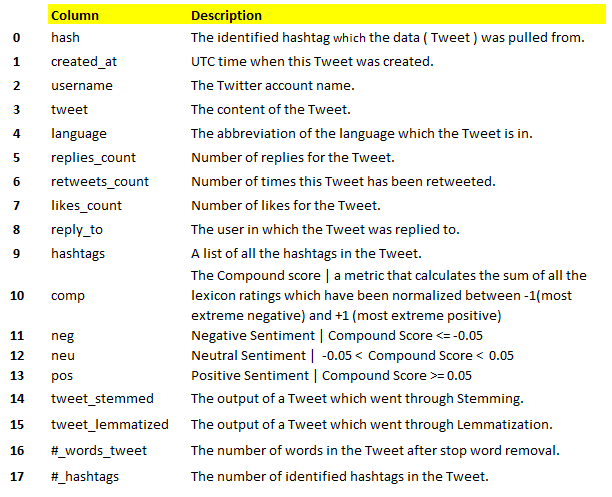

**We will run the `describe` function on the `main_df` only** as the additional numbers for `df_tweets_tfidf` are numerous.

In [8]:
df.describe()

replies_count  retweets_count    likes_count           comp  \
count  163699.000000   163699.000000  163699.000000  163699.000000   
mean        0.570889        6.148669      11.258169       0.095108   
std        13.535243      109.366725     173.143553       0.534434   
min         0.000000        0.000000       0.000000      -0.990100   
25%         0.000000        0.000000       0.000000      -0.361200   
50%         0.000000        0.000000       1.000000       0.077200   
75%         0.000000        1.000000       2.000000       0.539900   
max      3014.000000    16023.000000   32479.000000       0.998900   

                 neg            neu            pos  #_words_tweet  \
count  163699.000000  163699.000000  163699.000000  163699.000000   
mean        0.102678       0.728057       0.169265      14.371187   
std         0.124905       0.164872       0.161290       8.002316   
min         0.000000       0.078000       0.000000       1.000000   
25%         0.000000       0.616000       0.000000       8.000000   
50%         0.065000       0.725000       0.144000      13.000000   
75%         0.179000       0.835000       0.270000      20.000000   
max         0.897000       1.000000       0.922000      65.000000   

          #_hashtags  
count  163699.000000  
mean        3.267876  
std         2.637373  
min         1.000000  
25%         1.000000  
50%         3.000000  
75%         4.000000  
max        26.000000

To reiterate, **the hashtags pulled are exclusively Pro-HK & for transparency purposes we will display them here.**

In [9]:
df['hash'].unique()

array(['#FightForHongKong', '#HongKongProtest', '#PrayForHongkong',
       '#WeAreNotAlone', '#nochinaextradition', '#standwithhongkong',
       '#hkprotests', '#freehongkong', '#hkpolicebrutality',
       '#hkpolicestate', '#HKpoliceterrorist', '#hkpoliceterrorism'],
      dtype=object)

# **2.2 Initial Review**<a id='eda_ir'></a>

<a id='eda_hist'></a>**Histograms** | Histograms are an excellent way to review the range and density of values for each numeric features in the data set.

There's a lot to work with in here. **We will start with the `SentimentIntensityAnalyzer` #'s.**

In [10]:
twit_eda_sia = df[['comp','neg','neu','pos']].copy()
twit_eda_sia.columns = ['Comp Score','Negative Lot','Neutral Lot','Positive Lot']

array([[<AxesSubplot:title={'center':'Comp Score'}>,
        <AxesSubplot:title={'center':'Negative Lot'}>],
       [<AxesSubplot:title={'center':'Neutral Lot'}>,
        <AxesSubplot:title={'center':'Positive Lot'}>]], dtype=object)

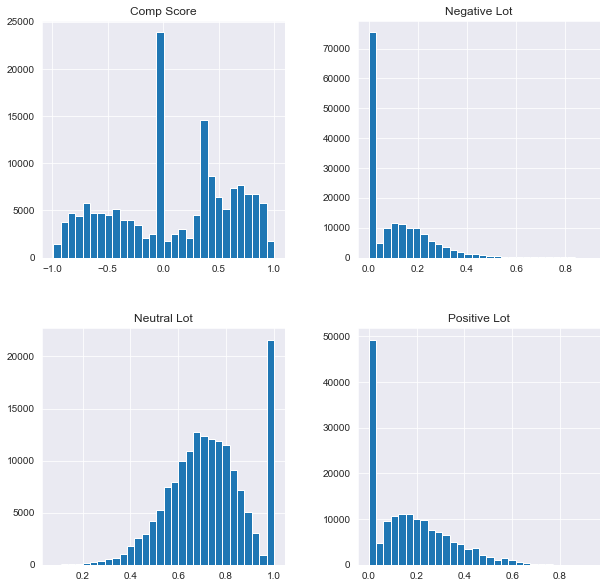

In [11]:
caption = 'Comp Score represents the Final Score while the word \'Lot\' refers to the % allocated.'
sns.set_style('darkgrid')
twit_eda_sia.hist(bins = 30,figsize=(10,10))
#fig.text(.5, .5, caption, ha='center')

Visually, the **skewness is seen in all except the `Comp Score` which looks Bimodal.**

The `Neutral Lot` has no visual skewness. 

In [12]:
print('Skewness Scores:','\n''\n',
      'Comp |', round(skew(twit_eda_sia['Comp Score']),2),'\n',
     'Negative |', round(skew(twit_eda_sia['Negative Lot']),2),'\n',
     'Positive |', round(skew(twit_eda_sia['Positive Lot']),2),'\n',
     'Neutral |', round(skew(twit_eda_sia['Neutral Lot']),2),)

Skewness Scores: 

 Comp | -0.26 
 Negative | 1.34 
 Positive | 0.84 
 Neutral | -0.11


The Skewness results show / suggest:
   * High Skewness
      * `Negative` | Negative Skewness | The Tweet population is **highly against the law** or **something associated with it**
   * Moderate Skewness
      * `Positive` | Negative Skewness | The Tweet population is **moderately for or against the law** or **something associated with it**

The `Comp` is mathematically a hybrid of positive & negative, & it's bimodal could suggest polarity; this will be reviewed / confirmed at a later stage.

<a id='eda_time_s'></a>**Time Series**

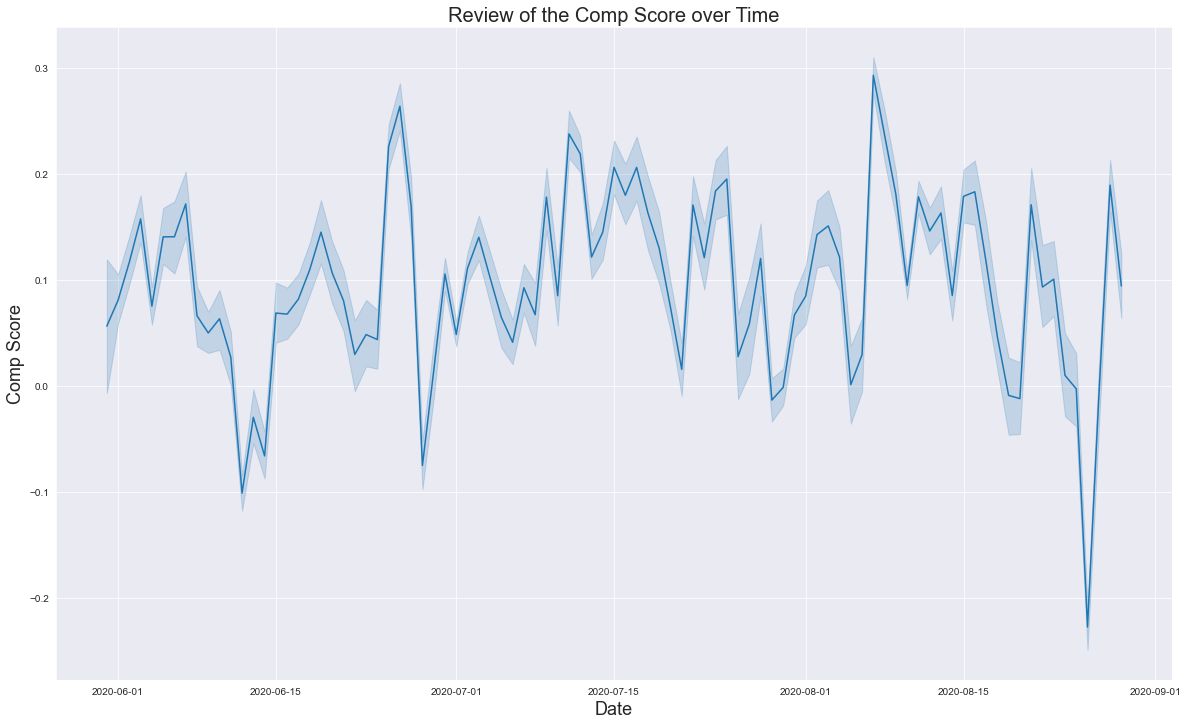

In [13]:
plt.figure(figsize=(20,12))
ax = sns.lineplot(data=df, x='created_at',y='comp')
# ax.set(xlabel='Comp Score', ylabel='Date', title='Review of the Comp Score over Time', fontsize=20)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Comp Score",fontsize=18)
plt.title("Review of the Comp Score over Time",fontsize=20)
plt.show()

**Initial Observations** | There appears to have been something:
   * Positive (+0.25) in:
      * Late June
      * Early August
   * Negative (-0.2) in:
     * Late August

We will keep this under consideration & dig a little deeper to see what was being discussed; **this may lead to the development of categories for the Tweets**.

In [14]:
df.comp.describe()

count    163699.000000
mean          0.095108
std           0.534434
min          -0.990100
25%          -0.361200
50%           0.077200
75%           0.539900
max           0.998900
Name: comp, dtype: float64

Let's define the parameters as:
   * Positve | +0.53
   * Negative | -0.36 

In [15]:
tw_above = df[(df.comp >= 0.53)]
tw_below = df[(df.comp <= -0.36)] 

We **will start** by looking at the **key words in Tweets at or below -0.36**

In [16]:
# we will first convert the text from all the titles into one string.
tweet_text = ''.join(review for review in tw_below.tweet.astype(str))
len(tweet_text)

6348447

In [17]:
# the word cloud only accepts 1M so we will have to reassign
tweet_text = tweet_text[:999999]
len(tweet_text)

999999

In [18]:
# We then load the spaCy model to parse the text string int
nlp = spacy.load('en_core_web_sm')
doc = nlp(tweet_text)

<a id='eda_wordc'></a>**Word Clouds**

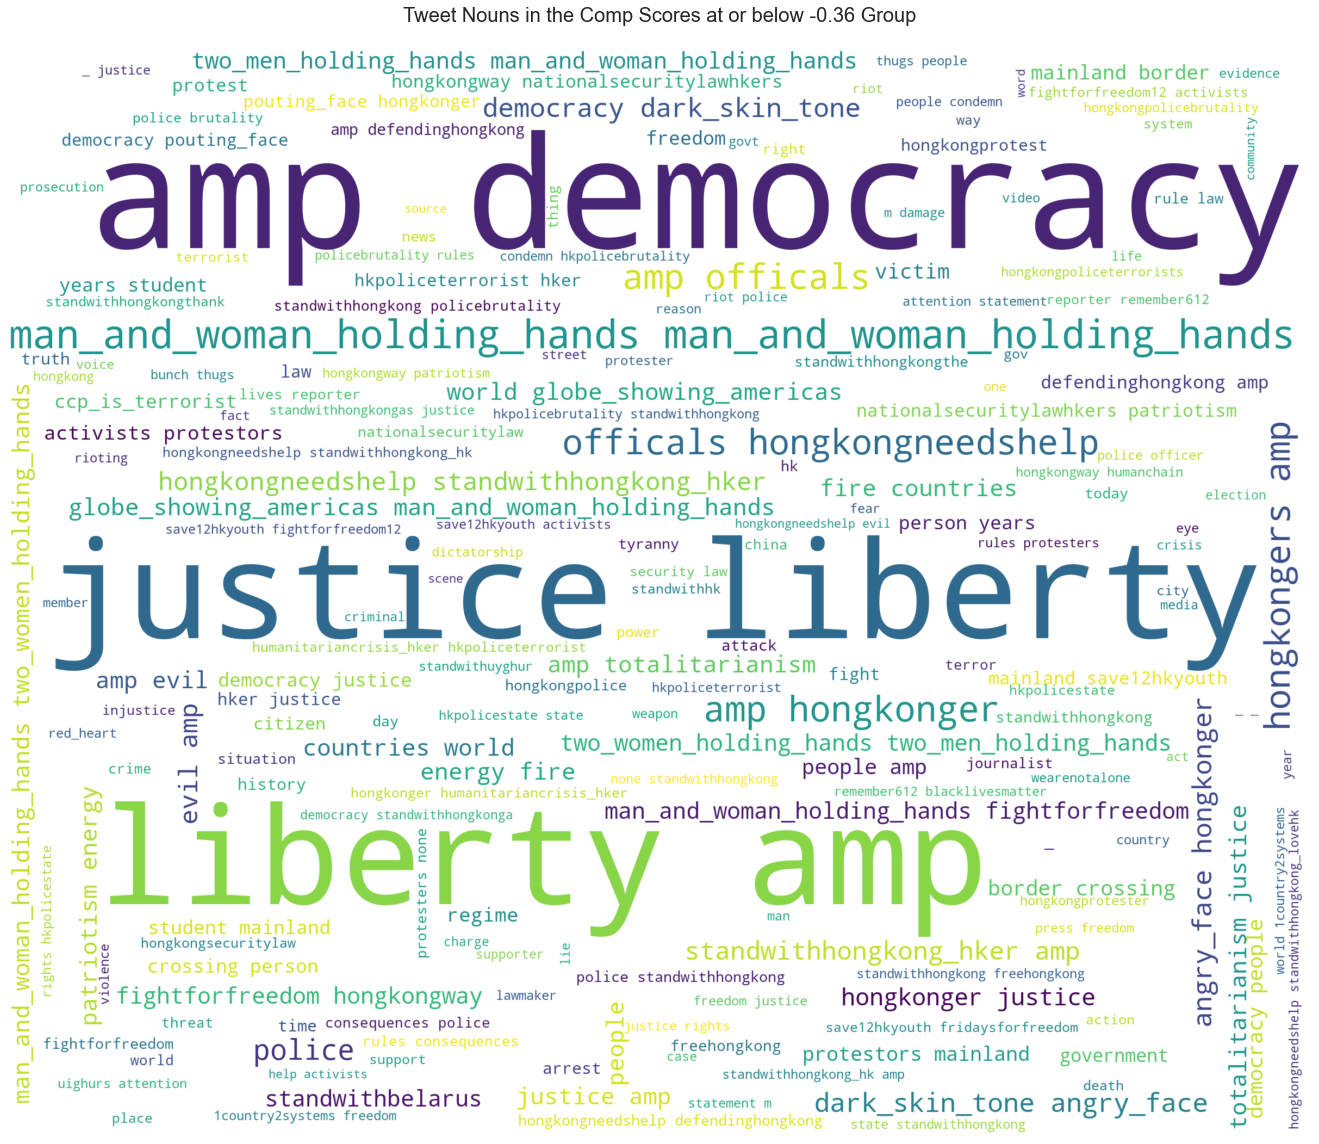

In [19]:
newText_t_noun =''
for word in doc:
    if word.pos_ in ['NOUN']:
        newText_t_noun = ' '.join((newText_t_noun, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_t_noun)
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Tweet Nouns in the Comp Scores at or below -0.36 Group\n', fontsize=20)
plt.axis('off')
plt.show()

In [20]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)

counts_neg = co.fit_transform(tw_below['tweet'])
counts_neg = pd.DataFrame(counts_neg.sum(axis=0),columns=co.get_feature_names())

# I will remove "obvious words" & incorrect word bi-grams
counts_neg = counts_neg.drop(columns = ['hong kong'])

counts_neg = counts_neg.T.sort_values(0,ascending=False)
counts_neg.columns = ['word_count']
counts_neg = counts_neg.head(30)
# counts_l_a.head(20)

Text(0.5, 1.0, 'Top 30 Bigrams Tweeters used in the at or below -0.36 Comp Score Group')

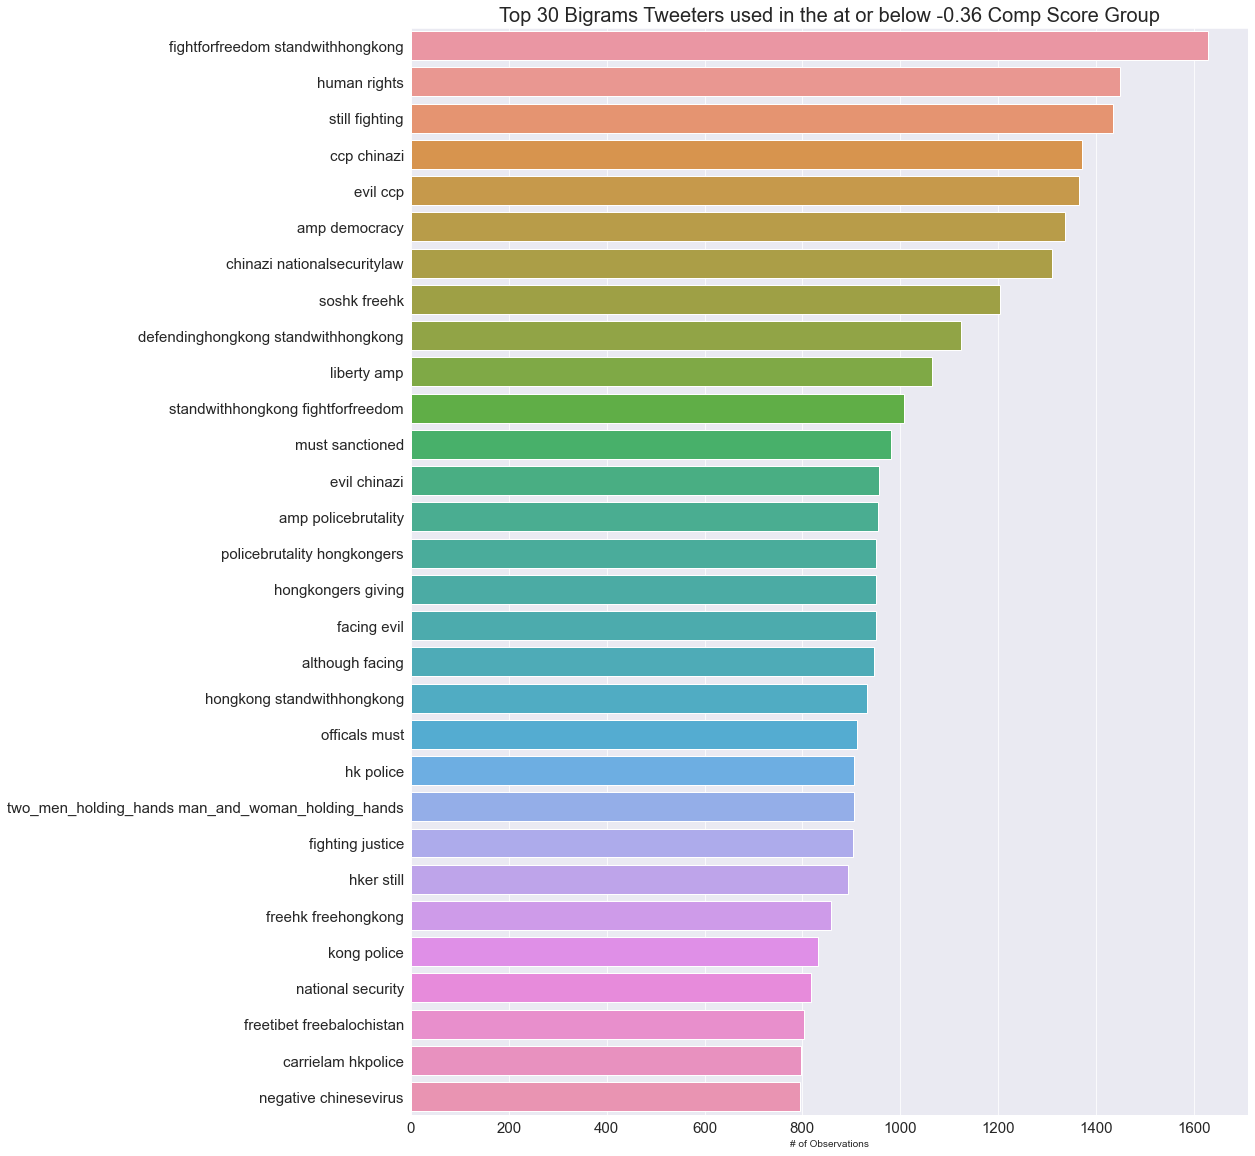

In [21]:
counts_neg_top = counts_neg.head(30)
counts_neg_top = counts_neg_top.reset_index()
counts_neg_top.columns = ['word','word_count']

fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(y = 'word',x = 'word_count',
            data = counts_neg_top.sort_values('word_count',ascending = False))
ax.set_xlabel('word_count')
plt.xlabel("# of Observations")
plt.ylabel("")
plt.tick_params(labelsize=15)
plt.title("Top 30 Bigrams Tweeters used in the at or below -0.36 Comp Score Group",fontsize=20)


**Negative Word Summary** | Many of the Tweets that were deemed `Negative` use Bigrams such as:
   * Human Rights
   * Evil CCP
   * References to Freedom / Democracy
   * Police Brutality
   * Fighting
   * Holdings Hands ( 👬 )
   * etc.
   

We will now look at the **key words in Tweets at or above 0.53**

In [22]:
# we will first convert the text from all the titles into one string.
tweet_text = ''.join(review for review in tw_above.tweet.astype(str))
len(tweet_text)

5445582

In [23]:
# the word cloud only accepts 1M so we will have to reassign
tweet_text = tweet_text[:999999]
len(tweet_text)

999999

In [24]:
# We then load the spaCy model to parse the text string int
nlp = spacy.load('en_core_web_sm')
doc = nlp(tweet_text)

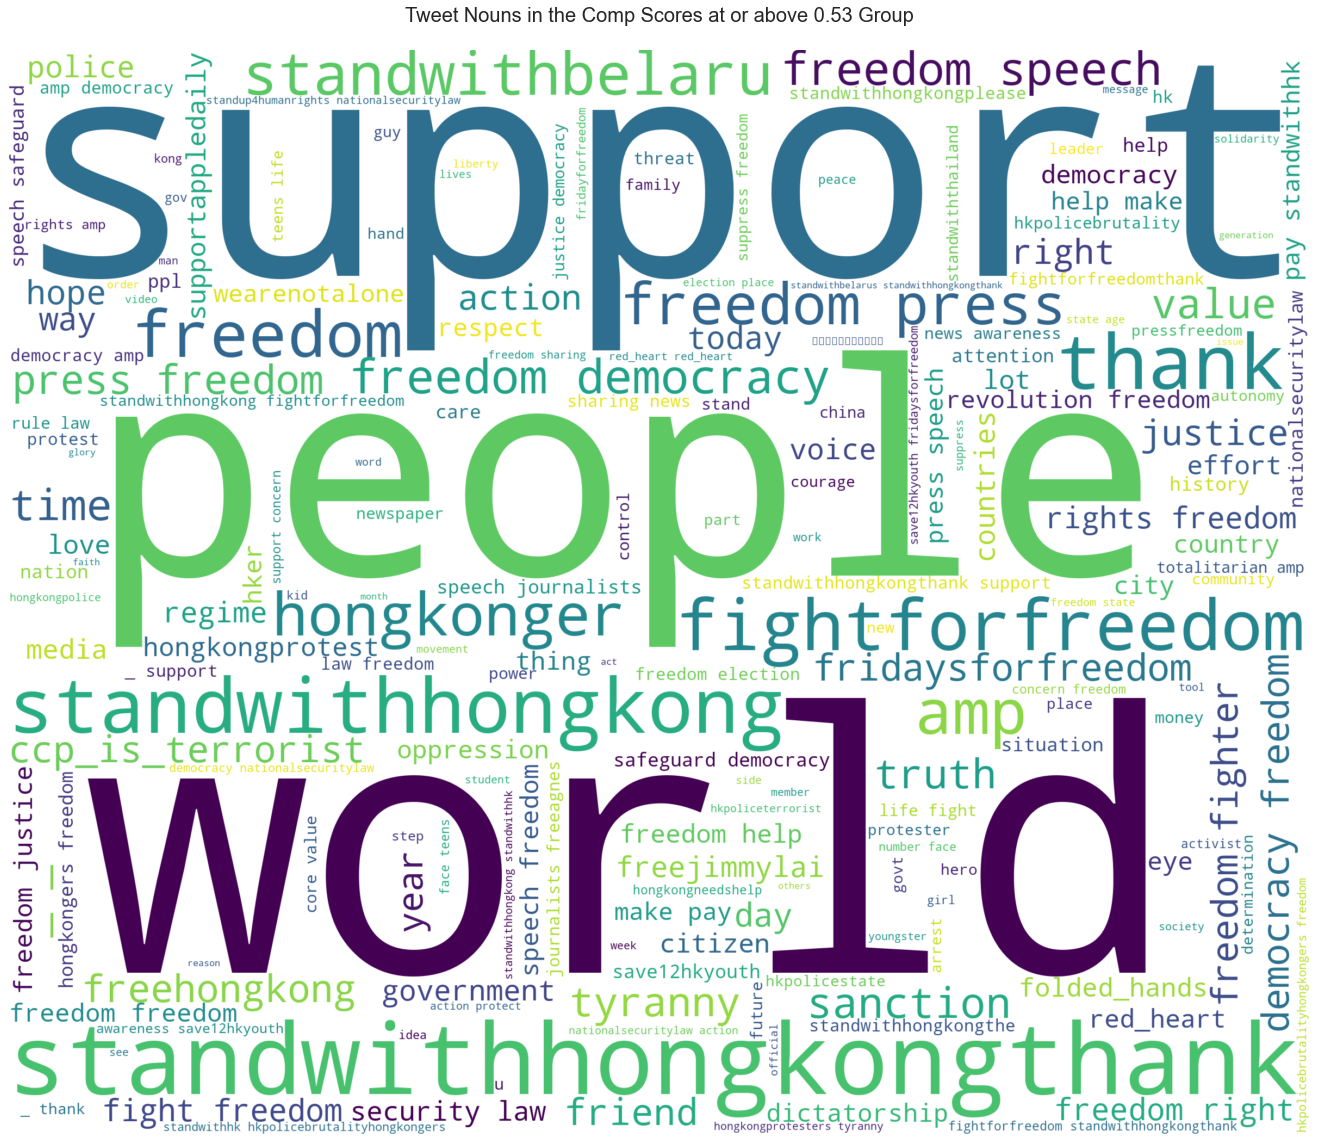

In [25]:
newText_t_noun =''
for word in doc:
    if word.pos_ in ['NOUN']:
        newText_t_noun = ' '.join((newText_t_noun, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_t_noun)
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Tweet Nouns in the Comp Scores at or above 0.53 Group\n', fontsize=20)
plt.axis('off')
plt.show()

In [26]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)

counts_neg = co.fit_transform(tw_above['tweet'])
counts_neg = pd.DataFrame(counts_neg.sum(axis=0),columns=co.get_feature_names())

# I will remove "obvious words" & incorrect word bi-grams
counts_neg = counts_neg.drop(columns = ['hong kong'])

counts_neg = counts_neg.T.sort_values(0,ascending=False)
counts_neg.columns = ['word_count']
counts_neg = counts_neg.head(30)
# counts_l_a.head(20)

Text(0.5, 1.0, 'Top 30 Bigrams Tweeters used in the at or above 0.53 Comp Score Group')

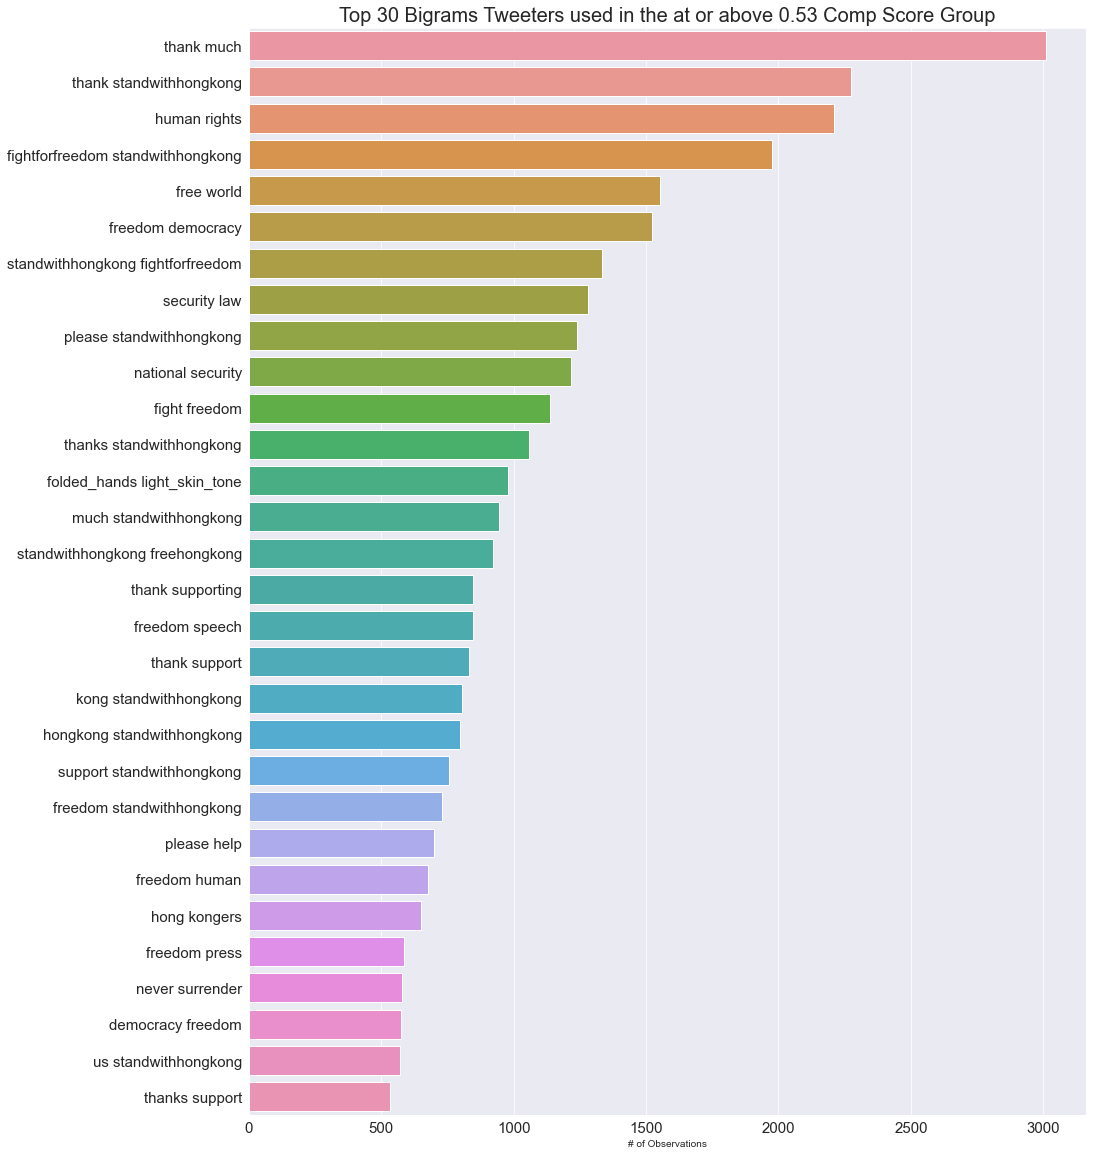

In [27]:
counts_neg_top = counts_neg.head(30)
counts_neg_top = counts_neg_top.reset_index()
counts_neg_top.columns = ['word','word_count']

fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(y = 'word',x = 'word_count',
            data = counts_neg_top.sort_values('word_count',ascending = False))
ax.set_xlabel('word_count')
plt.xlabel("# of Observations")
plt.ylabel("")
plt.tick_params(labelsize=15)
plt.title("Top 30 Bigrams Tweeters used in the at or above 0.53 Comp Score Group",fontsize=20)


**Positive Word Summary** | Many of the Tweets that were deemed `Positive` use Bigrams such as:
   * Thanks much / support
   * Human Rights
   * Free World
   * Please standwithhongkong / help
   * folded_hands ( 🙏 )
   * freedom press / democracy
   * etc.
   

**Results Together** | We will reiterate the results below:
   * Top 30 **Negative** Bigrams:
     * Human Rights
     * Evil CCP
     * References to Freedom / Democracy
     * Police Brutality
     * Fighting
     * Holdings Hands ( 👬 )

   * Top 30 **Positive** Bigrams:
     * Thanks much / support
     * Human Rights
     * Free World
     * Please standwithhongkong / help
     * folded_hands ( 🙏 )
     * freedom press / democracy

**Initial EDA Summary** | Looking at these results, there may be a categorization of:
   * Pro-China or Pro-HK
     * The establishment of which side your on ( China or Hong Kong ). Tweeters are likely to be HK-based & most ( if not all ) are likely to be Pro-HK
   * Police
     * Who the Tweeters may be fighting, deem as evil & wish to hold hands in unity ( either with the Police, other Tweeters or both )
   * Support
     * Which the Tweeters are thankful for, it helps & it "may" be coming from a place they call the free world 



<a id='eda_boxs'></a>**Box Plots**

In [28]:
df_sup = df.copy()
df_sup = df_sup.reset_index()
df_sup = df_sup.drop(columns=['index','username','replies_count','retweets_count','likes_count','reply_to','hashtags'])
df_sup['tweet_review'] = df_sup['tweet'].str.lower()
# df_sup.head(2)

In [29]:
# creating the master here
df_sup['tweet_review'] = df_sup['tweet'].str.contains('thanks|folded_hands', regex=True)

In [30]:
df_sup = df_sup[df_sup['tweet_review'] == True]
df_sup = df_sup.reset_index()
df_sup = df_sup.drop(columns=['index'])

In [31]:
len(df_sup)

6176

In [32]:
#subcategories
df_sup_up = df_sup[df_sup['hash'].isin(['#PrayForHongkong', '#WeAreNotAlone', '#nochinaextradition','#standwithhongkong'])].copy()
df_sup_mid = df_sup[df_sup['hash'].isin(['#FightForHongKong', '#HongKongProtest', '#hkprotests','#freehongkong'])].copy()
df_sup_down = df_sup[df_sup['hash'].isin(['#HKpoliceterrorist', '#hkpoliceterrorism', '#hkpolicestate','#hkpolicebrutality'])].copy()


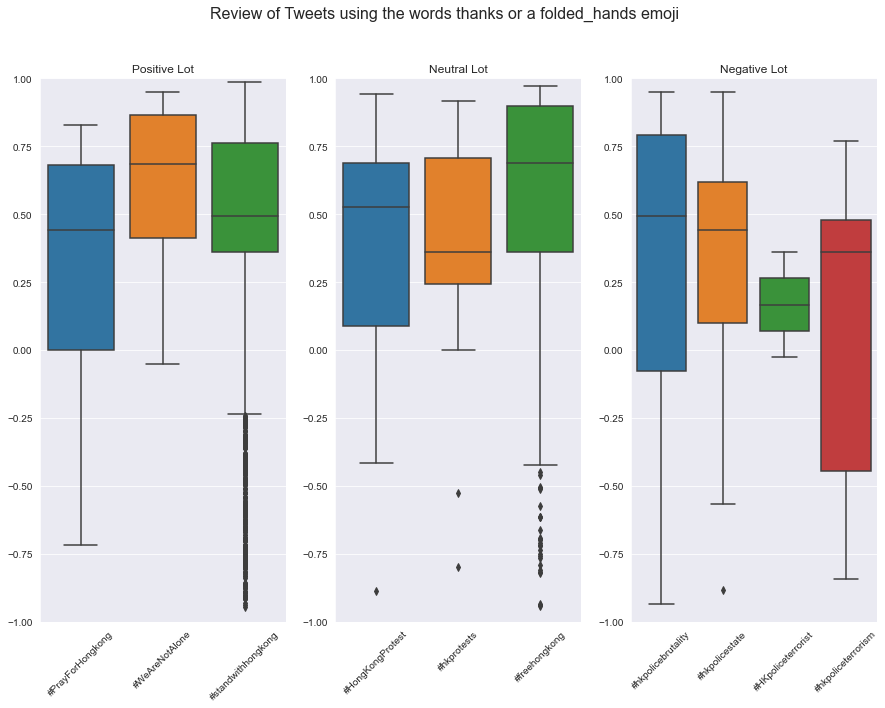

In [33]:
#Box Plot review of tweets that used the words thanks, support or a folded_hands emoji 
fig, ax = plt.subplots(1,3, figsize=(15,10))
plt.suptitle("Review of Tweets using the words thanks or a folded_hands emoji", size=16)
a = sns.boxplot(ax=ax[0], x="hash", y="comp", data=df_sup_up)
a.set(title='Positive Lot')
a.set(xlabel='', ylabel='')
a.set_xticklabels(a.get_xticklabels(),rotation=45)
a.set(ylim=(-1, 1))

b = sns.boxplot(ax=ax[1],x="hash", y="comp", data=df_sup_mid)
b.set(title='Neutral Lot')
b.set(xlabel='', ylabel='')
b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.set(ylim=(-1, 1))

c = sns.boxplot(ax=ax[2],x = "hash", y="comp", data=df_sup_down)
c.set(title='Negative Lot')
c.set(xlabel='', ylabel='')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c.set(ylim=(-1, 1))

plt.show()

**Box Plot Summary** | It appears as though there's no clear distinction between Police & others.

<a id='eda_geo_ent'></a>**Other Review** | Let's see if there's any connections with geopolitical entities.

In [34]:
df_sup_f = df_sup['tweet'].copy()

In [35]:
type(df_sup_f)

pandas.core.series.Series

In [36]:
df_sup_f.head()

0    Thank Japan🇯🇵 loudly_crying_face folded_hands ...
1    Thank supporting crying_cat_face folded_hands ...
2    , thanks everything done Hong Kong #FreeHongKo...
3    Congrats thanks #StandWithHongKong #StandWithH...
4    _Andrea Thank #StandwithHongKong! 🥺 folded_han...
Name: tweet, dtype: object

In [37]:
# pulling all the tweets into cell for review
df_sup_f = df_sup_f.str.cat(sep=' ')

# The United States is referred to in various ways; we will push them all into one
df_sup_f = df_sup_f.replace('USA','US')
df_sup_f = df_sup_f.replace('America','US')
df_sup_f = df_sup_f.replace('United States','US')
df_sup_f = df_sup_f.replace('U.S.','US')
df_sup_f = df_sup_f.replace('America 🇺 🇸','US')
df_sup_f = df_sup_f.replace('California','US')
df_sup_f = df_sup_f.replace('🇺 🇸','US')

# So is the United Kingdom; we will push them all into one
df_sup_f = df_sup_f.replace('Britain','UK')
df_sup_f = df_sup_f.replace('United Kingdom','UK')

# And the others.
df_sup_f = df_sup_f.replace('🇯 🇵','Japan')
df_sup_f = df_sup_f.replace('Paris','France')


In [38]:
def check_len(x):
    if len(x) >= 1000000:
        print("{:,}".format(len(x)),'| Given the parser & NER models requires a max length of 1M, we unfortunately have to cut.')
        x = x[:999999]
        
    else:
        print("{:,}".format(len(x)),'| Although the parser & NER models requires a max length of 1M, we don\'t need to do anything for this one.')
        None
            

In [39]:
check_len(df_sup_f)

962,828 | Although the parser & NER models requires a max length of 1M, we don't need to do anything for this one.


In [40]:
doc = nlp(df_sup_f)
entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df_ner = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])

In [41]:
df_ner.head(2)

text type            lemma
0            Japan  GPE            Japan
1  light_skin_tone  GPE  light_skin_tone

In [42]:
df_ner_gpe = df_ner[df_ner.type == 'GPE'].lemma.value_counts()

In [43]:
df_ner_gpe.head(5)

light_skin_tone    1388
Hong Kong           738
China               267
US                  255
UK                  154
Name: lemma, dtype: int64

In [44]:
# the light_skin_tone emoji is not a geopolitical entity; thus we will drop & look at the top 5
df_ner_gpe = df_ner_gpe.drop(labels='light_skin_tone')
df_ner_gpe_bc = df_ner_gpe.head(5)

In [45]:
df_ner_gpe_bc = pd.DataFrame(df_ner_gpe.head(5))
df_ner_gpe_bc = df_ner_gpe_bc.reset_index()
df_ner_gpe_bc.columns = ['country','count']

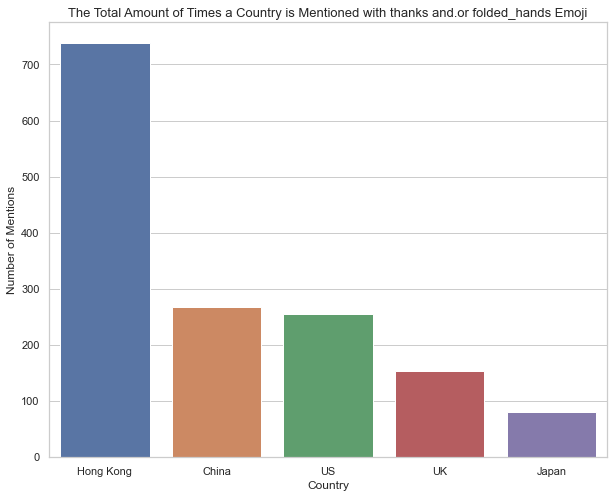

In [46]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="country", y="count", data=df_ner_gpe_bc)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Number of Mentions",fontsize=12)
plt.title("The Total Amount of Times a Country is Mentioned with thanks and.or folded_hands Emoji",fontsize=13)
plt.show()

These results make sense as Hong Kong & China are the topics while the following three (3) countries align with our news section which was not done on purpose.

**What does seem strange is China takes the top spot after HK; let's take a look at what those tweets were composed of. I have reason to believe they fall into one of two categories:**
   * The Tweet community supports the Law
     * Unlikely as the Hash Tags pulled are Pro-HK
   * The Tweet are sarcastic comments
     * Likely but let's confirm

<a id='eda_sup_sar'></a>**Other Review** (cont.) | Taking a dive into the sentences which mention China to determine if Tweeters support the Law or if there's sarcasm.

In [47]:
df_sup_c = df_sup.copy()
df_sup_c['has_china'] = df_sup_c['tweet'].str.contains('China', regex=True)
df_sup_c['has_thanks'] = df_sup_c['tweet'].str.contains('thanks', regex=True)
df_sup_c['has_folded_hands'] = df_sup_c['tweet'].str.contains('folded_hands', regex=True)

index_names = df_sup_c[(df_sup_c['has_china'] == False)].index
df_sup_c.drop(index_names, inplace = True)
index_names = df_sup_c[(df_sup_c['has_thanks'] == False)].index
df_sup_c.drop(index_names, inplace = True)
index_names = df_sup_c[(df_sup_c['has_folded_hands'] == False)].index
df_sup_c.drop(index_names, inplace = True)

df_sup_ch = df_sup_c['tweet'].copy()
df_sup_ch = df_sup_ch.reset_index()
df_sup_ch = df_sup_ch.drop(columns=['index'])

c1 = df_sup_ch['tweet'][1]
c2 = df_sup_ch['tweet'][5]
c3 = df_sup_ch['tweet'][10]

print('Examples of observations with both thanks & folded_hands for China are below.','\n','\n',
     c1,'\n','\n',c2,'\n','\n',c3)

Examples of observations with both thanks & folded_hands for China are below. 
 
 Thank #StandWithHongKong !!! We sincerely hope free world stand firm Communist China’s human rights abuses Hong Kong. Many thanks folded_hands light_skin_tone 
 
 Deeply touched heartfelt thanks done #HK folded_hands light_skin_tone folded_hands light_skin_tone folded_hands light_skin_tone Always grateful international support fighting evil #CCPChina regime. #StandWithHongKong 
 
 Thank much #StandWithHongKong . folded_hands Although don’t know actually plans, still thanks UK helps. #newwestberlin #5DemandsNot1Less #BoycottChina


Based on the results, **I believe there is a fair bit of sarcasm**; a matter which will be further attended too.

Although mentions of the UK & free world are above, **I believe this sarcasm needs to be reviewed with the some of the others**. Since the US was not mentioned above & is that largest country contributing to the data frame with these conditions, **I will look at a snippet from the US in the same manner.**

In [48]:
df_sup_us = []

In [49]:
df_sup_us = df_sup.copy()
df_sup_us['has_us'] = df_sup_us['tweet'].str.contains('US', regex=True)
df_sup_us['has_thanks'] = df_sup_us['tweet'].str.contains('thanks', regex=True)
df_sup_us['has_folded_hands'] = df_sup_us['tweet'].str.contains('folded_hands', regex=True)

index_names = df_sup_us[(df_sup_us['has_us'] == False)].index
df_sup_us.drop(index_names, inplace = True)
index_names = df_sup_us[(df_sup_us['has_thanks'] == False)].index
df_sup_us.drop(index_names, inplace = True)
index_names = df_sup_us[(df_sup_us['has_folded_hands'] == False)].index
df_sup_us.drop(index_names, inplace = True)

df_sup_us = df_sup_us['tweet'].copy()
df_sup_us = df_sup_us.reset_index()
df_sup_us = df_sup_us.drop(columns=['index'])

us1 = df_sup_us['tweet'][0]
us2 = df_sup_us['tweet'][1]
us3 = df_sup_us['tweet'][2]

print('Examples of observations with both thanks & folded_hands for the US are below.','\n','\n',
     us1,'\n','\n',us2,'\n','\n',us3)

Examples of observations with both thanks & folded_hands for the US are below. 
 
 Heartfelt thanks standing solidarity Hongkongers folded_hands Pls consider implementation #MagnitskyAct sanction CCP &amp; HK officials violate "1country2systems" &amp; "high autonomy" promises Joint Declaration fire Let JUSTICE done UK #StandwithHongKong 
 
 _nozomi Thank much US UK,thanks always supportive us red_heart ️ folded_hands light_skin_tone #StandWithHongKong 
 
 As hongkonger, cannot save home without help US. We believe democracy freedom important everywhere world. HKers appreciate please see help ~ please save US HK folded_hands light_skin_tone #freehongkong #thanksTrump #thankUS


Based on the results, **I don't believe there is any sarcasm**.

Sarcasm is a tricky one & thus **these can't be 100% ruled out as not sarcastic but I don't see the word "thanks" or emoji "folded_hands" wrapped around criticism towards to the US as seen in the China examples.**

<a id='eda_text_b'></a>**Text Blob** | Let's revisit the main comp score & determine if there is much polarity from the tweets. 
We will use textblob for this exercise in the following order:
   * We will reassign to it's own data frame (as usual) to ensure the main one isn't disturbed.
   * We will then define a function to protect from a tweet not being a string.
   * Then review

In [50]:
df_tb = df.copy()
len(df_tb)

163699

In [51]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df_tb['sentiment'] = df_tb['tweet'].apply(sentiment_calc)


In [52]:
# there appears to be one row that did not pass the sentiment scoring; let's double confirm
is_NaN = df_tb.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_tb[row_has_NaN]
print(rows_with_NaN.tweet)

132118    0
Name: tweet, dtype: object


In [53]:
# confirmed; let's drop it
df_tb = df_tb.drop([132118])
print((df_tb['sentiment'].isnull()).sum(),'| Number of columns that may not have passed.')

0 | Number of columns that may not have passed.


In [54]:
df_tb.tail(3)

hash created_at         username  \
163696  #hkpoliceterrorism 2020-06-01  bluedreamsplan2   
163697  #hkpoliceterrorism 2020-05-31  dingdin34098358   
163698  #hkpoliceterrorism 2020-05-31  bluedreamsplan2   

                                                    tweet  replies_count  \
163696  Don't fall trap! #HKPoliceTerrorism #HongKongP...              0   
163697  The HK police killed South Asian force. The HK...              0   
163698  China try hard link #Minnesotariots #HongKongP...              0   

        retweets_count  likes_count  \
163696               0            0   
163697               1            1   
163698               0            1   

                                                 reply_to  \
163696                                                 []   
163697  [{'screen_name': 'ajphelo', 'name': 'Andrew J ...   
163698  [{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...   

                                                 hashtags    comp    neg  \
163696  ['hkpoliceterrorism', 'hongkongpolicestate', '... -0.3802  0.178   
163697           ['policebrutality', 'hkpoliceterrorism'] -0.6705  0.200   
163698  ['minnesotariots', 'hongkongprotests', 'minnia...  0.6808  0.041   

          neu    pos                                      tweet_stemmed  \
163696  0.822  0.000  ['dont', 'fall', 'trap', 'hkpoliceterror', 'ho...   
163697  0.800  0.000  ['hk', 'polic', 'kill', 'south', 'asian', 'for...   
163698  0.756  0.203  ['china', 'tri', 'hard', 'link', 'minnesotario...   

                                         tweet_lemmatized  #_words_tweet  \
163696  ["Don't", 'fall', 'trap!', '#HKPoliceTerrorism...             11   
163697  ['The', 'HK', 'police', 'killed', 'South', 'As...             16   
163698  ['China', 'try', 'hard', 'link', '#Minnesotari...             23   

        #_hashtags                                   sentiment  
163696           5                                  (0.0, 0.0)  
163697           2  (0.09999999999999999, 0.16666666666666666)  
163698           5  (-0.14583333333333334, 0.2708333333333333)

Great. TextBlob returned a tuple structured as per below:
   * (polarity, subjectivity )

We will now split the `sentiment` column into `polarity` & `subjectivity`; the key values in the `sentiment array`.

In [55]:
senti_list = df_tb['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
df_sentiment_split = pd.DataFrame(senti_list, columns=columns, index=df_tb.index)

In [56]:
#double checking the data frames are the same length
print(len(df_tb)-len(df_sentiment_split),'| Variance between the two')

0 | Variance between the two


In [57]:
df_tb_po = pd.concat([df_tb,df_sentiment_split],
                    axis = 1, ignore_index=False)

In [58]:
df_tb_po.head(3)

hash created_at         username  \
0  #FightForHongKong 2020-08-28    ginny81025554   
1  #FightForHongKong 2020-08-25  peterhjorth_ddp   
2  #FightForHongKong 2020-08-24  peterhjorth_ddp   

                                               tweet  replies_count  \
0  Thanks speaking us #fridaysforfreedom #fightfo...              0   
1  How stop China Hong Kong. Read new report Dani...              0   
2  How stop China Hong Kong. Read new report Dani...              0   

   retweets_count  likes_count  \
0               1            2   
1               0            0   
2               0            0   

                                            reply_to  \
0  [{'screen_name': 'benedictrogers', 'name': 'Be...   
1                                                 []   
2                                                 []   

                                            hashtags    comp    neg    neu  \
0          ['fridaysforfreedom', 'fightforhongkong']  0.4404  0.000  0.707   
1  ['dkpol', 'kina', 'hongkongprotest', 'fightfor... -0.2960  0.071  0.929   
2  ['dkpol', 'kina', 'hongkongprotest', 'fightfor... -0.2960  0.071  0.929   

     pos                                      tweet_stemmed  \
0  0.293  ['thank', 'speak', 'us', 'fridaysforfreedom', ...   
1  0.000  ['stop', 'china', 'hong', 'kong', 'read', 'new...   
2  0.000  ['stop', 'china', 'hong', 'kong', 'read', 'new...   

                                    tweet_lemmatized  #_words_tweet  \
0  ['Thanks', 'speaking', 'u', '#fridaysforfreedo...              5   
1  ['How', 'stop', 'China', 'Hong', 'Kong.', 'Rea...             25   
2  ['How', 'stop', 'China', 'Hong', 'Kong.', 'Rea...             25   

   #_hashtags                                   sentiment  polarity  \
0           2                                  (0.2, 0.2)  0.200000   
1          13  (0.13636363636363635, 0.45454545454545453)  0.136364   
2          13  (0.13636363636363635, 0.45454545454545453)  0.136364   

   subjectivity  
0      0.200000  
1      0.454545  
2      0.454545

Here we will take a quick look at the TextBlob outputs.

In [59]:
twit_eda_tb = df_tb_po[['polarity','subjectivity']].copy()
twit_eda_tb.columns = ['Polarity','Subjectivity']

array([[<AxesSubplot:title={'center':'Polarity'}>,
        <AxesSubplot:title={'center':'Subjectivity'}>]], dtype=object)

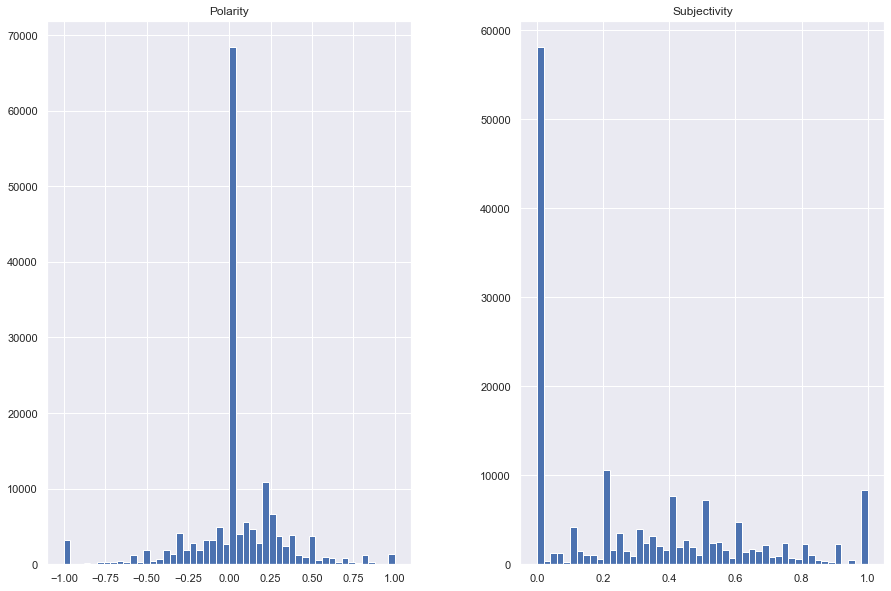

In [60]:
#caption = 'Comp Score represents the Final Score while the word \'Lot\' refers to the % allocated.'
sns.set_style('darkgrid')
twit_eda_tb.hist(bins = 50,figsize=(15,10))
#fig.text(.5, .5, caption, ha='center')

TextBlob Output can be understood by:
   * Polarity is a float within the range [-1.0, 1.0]
      * 1 means a Positive Statement & vice versa
   * Subjectivity is a float within the range [0.0, 1.0] 
     * 0.0 is very objective & 1.0 is very subjective.

With this, it **appears as though**:
   * Most of the **Tweets are Positive**
   * The **Tweets have Objective ( not Subjective ) ground**
   * It is my understanding that TextBlob normally returns a high 0 score on Polarity; something to consider looking further into
   

Let's see how TextBlob's Polarity & Subjectivity talk with each other with a **Scatter Plot**

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

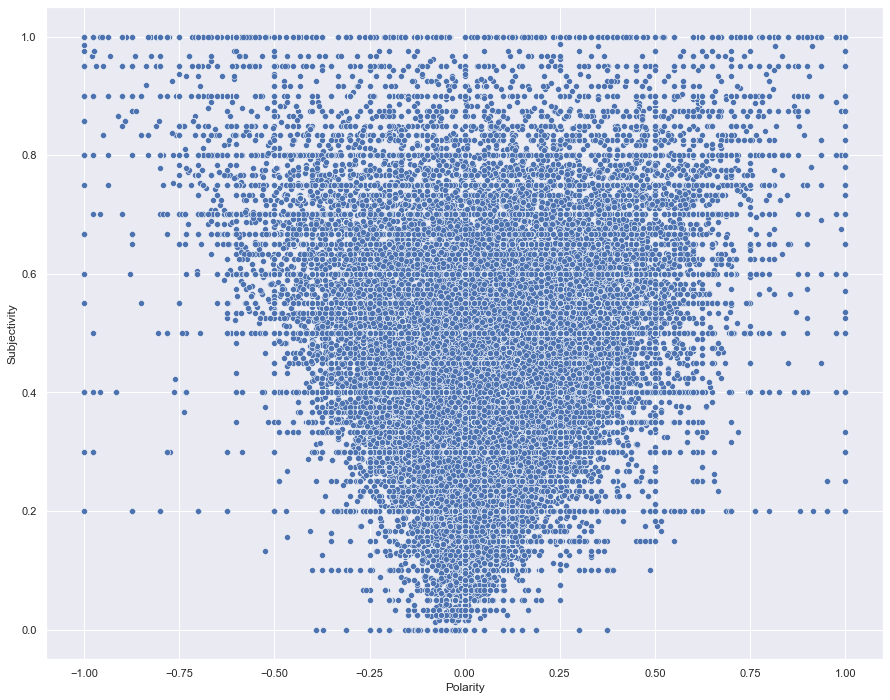

In [61]:
fig = plt.subplots(figsize=(15,12))
sns.set_style('darkgrid')
sns.scatterplot(data=twit_eda_tb, x="Polarity", y="Subjectivity")


Additional color coding for categories (discussed previously) may potentially add some color to this plethora of data points (no pun intended).

Let's now look at a Scatter Plot of Polarity with Tdidf Comp Scores.

<AxesSubplot:xlabel='polarity', ylabel='comp'>

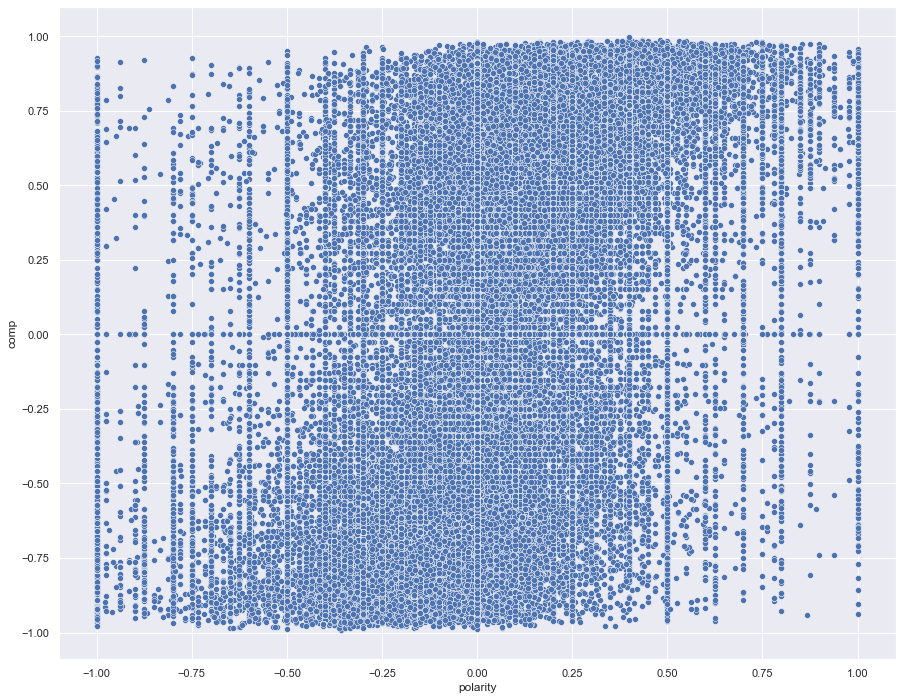

In [62]:
fig = plt.subplots(figsize=(15,12))
sns.set_style('darkgrid')
sns.scatterplot(data=df_tb_po, x="polarity", y="comp")


Same as the comment before.

# **2.3 Setting the Stage for Clustering**<a id='ssfc'></a>

Based on what we could initially see from before, **we will examine different ideas whereby we can potentially cluster Topics** successfully to give us a clearer idea of what Topics were Tweeted.

<a id='eda_pyLDAvis'></a>The **pyLDAvis will be the final result but the data will be passed through**
   * Stop Word Re-Removal, 
   * Lemmatization & 
   * Bag of Words 

Before the data gets to pyLDAvis. **pyLDAvis will help better visualize potential clustering.**

In [63]:
df['tweet'].head(2)

0    Thanks speaking us #fridaysforfreedom #fightfo...
1    How stop China Hong Kong. Read new report Dani...
Name: tweet, dtype: object

**Setting up a Seperate Data Frame**

In [64]:
df_cluster = df.copy()
#lowercasing the words in the tweets
df_cluster['tweet'] = df_cluster['tweet'].str.lower()
#Let’s get rid of them using regular expressions
#removing the hashtags from the tweets
df_cluster['tweet'] = df_cluster['tweet'].str.replace("#[A-Za-z0-9]+","")
#removing punctuation
df_cluster['tweet'] = df_cluster['tweet'].str.replace('[^\w\s]','')
#removing numbers
df_cluster['tweet'] = df_cluster['tweet'].str.replace('\d+', '')
#removing Chinese characters
df_cluster['tweet'] = df_cluster['tweet'].str.replace(r'[^\x00-\x7F]+', '')
df_cluster['tweet'].head(2)

<>:8: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \d
<>:8: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \d
<ipython-input-64-a9a20fd6bc07>:8: DeprecationWarning: invalid escape sequence \w
  df_cluster['tweet'] = df_cluster['tweet'].str.replace('[^\w\s]','')
<ipython-input-64-a9a20fd6bc07>:10: DeprecationWarning: invalid escape sequence \d
  df_cluster['tweet'] = df_cluster['tweet'].str.replace('\d+', '')


0                                 thanks speaking us  
1    how stop china hong kong read new report danis...
Name: tweet, dtype: object

In [65]:
len(df_cluster)

163699

In [66]:
df_cluster['tweet'].isnull().sum()

1

In [67]:
is_NaN = df_cluster.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_cluster[row_has_NaN]
rows_with_NaN

hash created_at  username tweet  replies_count  \
132118  #freehongkong 2020-07-23  spqrdawg   NaN              0   

        retweets_count  likes_count reply_to  \
132118               0            0       []   

                                                 hashtags  comp  neg  neu  \
132118  ['freehongkong', 'freehongkong', 'chinesecommu...   0.0  0.0  1.0   

        pos                                      tweet_stemmed  \
132118  0.0  ['', 'state', 'sponsor', 'media', 'freehongkon...   

                                         tweet_lemmatized  #_words_tweet  \
132118  ['=', 'STATE', 'SPONSORED', 'MEDIA', '#FreeHon...              7   

        #_hashtags  
132118           3

In [68]:
df_cluster = df_cluster.drop([132118])

In [69]:
df_cluster['tweet'].isnull().sum()

0

<a id='eda_lemming'></a>**Lemmatization**

In [70]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(df_cluster['tweet'])
print(lemmatized_texts[0][0:90])

thank speak


That doesn't mean much; it's just confirmation that it worked & it allows a topic model to categorize things easily.

<a id='eda_swr'></a>**Stop Word Removal** | Reduce text to individual words & double confirm stop words have been removed.

In [71]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True) #deacc is a boolean for accent words; may have so it's true
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print(data_words[1][0:20])

['how', 'stop', 'china', 'hong', 'kong', 'read', 'new', 'report', 'danish', 'think', 'tank', 'cipo']


We now have stop_words removed & much cleaner text. Lemmization isn't perfect so words like `cipo` doesn't make sense but we have clean set to build a topic model.

<a id='eda_bow'></a>**Bag of Words**

In [72]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus.append(new)

print (corpus[1][0:20])

[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


That list of arrays doesn't make much sense to us humans so I will show you what the first array means for reference.

In [73]:
word = id2word[[1][:][0]]
print(word)

thank


<a id='eda_ldam'></a>**LdaModeling** | We now have a dictionary to lookup words & their frequency.

In [74]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=30,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**pyLDAvis** | Visualizing the Tweet Data

In [75]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22    -0.528318  0.099111       1        1  8.980569
26     0.175912 -0.499128       2        1  8.414656
11     0.444155  0.221164       3        1  8.260152
0      0.363529  0.349050       4        1  7.619266
8      0.501289 -0.172519       5        1  6.468152
19    -0.016346 -0.483281       6        1  6.256667
4     -0.359074  0.377932       7        1  5.214642
3      0.502521  0.057268       8        1  5.094746
17    -0.436208 -0.290033       9        1  5.057150
9     -0.461398 -0.069975      10        1  4.423182
14    -0.290142  0.352982      11        1  4.194474
16    -0.162341 -0.454565      12        1  3.943099
27    -0.252928 -0.351453      13        1  3.470793
15     0.376842 -0.020629      14        1  2.761639
21     0.070830  0.498319      15        1  2.725623
18     0.368042 -0.317342      16        1  2.438199
5      0.259000 -0.241562      17        1  2.429650
20    -0.370359  0.141846      18        1  2.178379
13    -0.326450 -0.180012      19        1  2.104834
29     0.127035  0.381753      20        1  1.998451
24     0.207838  0.264694      21        1  1.629753
10    -0.103506  0.275672      22        1  1.574238
1     -0.093261  0.430136      23        1  1.254001
25     0.108454 -0.322598      24        1  1.035579
6      0.052404  0.028838      25        1  0.245686
28    -0.051864 -0.065145      26        1  0.128932
12    -0.026390 -0.002652      27        1  0.024372
7     -0.026426 -0.002622      28        1  0.024372
23    -0.026417 -0.002628      29        1  0.024372
2     -0.026422 -0.002624      30        1  0.024372, topic_info=       Term          Freq         Total Category  logprob  loglift
81      amp  45834.000000  45834.000000  Default  30.0000  30.0000
5      hong  58287.000000  58287.000000  Default  29.0000  29.0000
300  police  52150.000000  52150.000000  Default  28.0000  28.0000
7      kong  55548.000000  55548.000000  Default  27.0000  27.0000
50       hk  27729.000000  27729.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
20     here      0.011587   1251.437354  Topic30 -10.3456  -3.2704
21     want      0.011587  15445.620761  Topic30 -10.3456  -5.7834
22    world      0.011587  28779.289168  Topic30 -10.3456  -6.4058
24    japan      0.011587    153.298202  Topic30 -10.3456  -1.1707
29     form      0.011587    589.886455  Topic30 -10.3456  -2.5183

[1305 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
278      19  0.995676     affect
147       1  0.999523      allow
371      20  0.999748    already
365      13  0.999762       also
81       11  0.999961        amp
...     ...       ...        ...
33        1  0.991975       wong
22        6  0.999920      world
177       6  0.998423  worldwide
137       5  0.999771       year
102      13  0.998188  yesterday

[239 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 27, 12, 1, 9, 20, 5, 4, 18, 10, 15, 17, 28, 16, 22, 19, 6, 21, 14, 30, 25, 11, 2, 26, 7, 29, 13, 8, 24, 3])

For our first round, we will outline what is observed:
   * The area of each circle represents the importance of the topic relative to the corpus
   * We have 30 Topics thus 30 circles
   * The distance between the center of the circles indicates the similarity between the topics
     * You can see that Topics 3 & 4 overlap as well as 7 & 11 indicating these topics are more similar to each other respectively
   * Topics 25+ are in the center & small suggesting they don't have much importance.
   * On the right side, the Top 30 identified words for each Topic is outlined


<a id='eda_bgrams'></a>**Bigrams** | There are a lot of words that aren't really words with a lot of meaning or helping us much. Therefore, we should create a Removal List to make adjustments to the code & Pre-Processing to help these Topics to harmonize better. We will hold on that until we see how **Bigrams** & **Trigrams** (a collection of words) present clusters which may be an even better approach.

In [76]:
bigrams_phrases = gensim.models.Phrases(data_words,min_count=5, threshold=50)
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigrams_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [77]:
print(data_bigrams_trigrams[8])

['jpn', 'thank', 'japan', 'brother_sister']


In [78]:
df['tweet'][8]

'_JPN Thank japan brother sister!! #freehongkong #fightforhongkong'

Let's start working with gensim & TfidF

In [79]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus[i] = new_bow


In [80]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=20,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**Visualizing the Data**

In [81]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.302098  0.370213       1        1  12.857433
2      0.243047 -0.449535       2        1  10.073995
11    -0.252502 -0.105519       3        1   9.894564
13    -0.094935  0.489738       4        1   7.495751
8      0.333566 -0.265966       5        1   6.937073
12     0.431944 -0.116837       6        1   5.428329
4      0.124791  0.429359       7        1   5.369059
14    -0.229398 -0.422729       8        1   5.255415
1     -0.465174  0.179721       9        1   5.017527
10     0.355496  0.197528      10        1   4.437221
19     0.488237  0.069034      11        1   4.184643
9     -0.015969  0.259791      12        1   4.032710
3     -0.373914 -0.266471      13        1   3.290766
6     -0.273685  0.353862      14        1   3.195906
7      0.024246 -0.443921      15        1   3.162511
17    -0.259959  0.148239      16        1   2.997775
18    -0.043988 -0.290510      17        1   2.923940
16    -0.465825 -0.064297      18        1   2.151188
5      0.132040 -0.077775      19        1   1.270430
15     0.039882  0.006077      20        1   0.023765, topic_info=               Term         Freq         Total Category  logprob  loglift
5              hong  64179.00000  64179.000000  Default  30.0000  30.0000
290          police  40352.00000  40352.000000  Default  29.0000  29.0000
7              kong  61162.00000  61162.000000  Default  28.0000  28.0000
78              amp  27288.00000  27288.000000  Default  27.0000  27.0000
164        negative  29331.00000  29331.000000  Default  26.0000  26.0000
..              ...          ...           ...      ...      ...      ...
22            world      0.00961  24987.874421  Topic20 -10.4345  -6.4264
23   brother_sister      0.00961      2.257437  Topic20 -10.4345   2.8855
24            japan      0.00961    109.564021  Topic20 -10.4345  -0.9968
28             form      0.00961    608.764293  Topic20 -10.4345  -2.7117
29      joshua_wong      0.00961     41.726531  Topic20 -10.4345  -0.0314

[1019 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
268      10  0.995246     affect
141       9  0.999404      allow
363      13  0.999611    already
357      12  0.999683       also
78       18  0.999906        amp
...     ...       ...        ...
53        6  0.999570    with_hk
22        7  0.999925      world
170       1  0.997352  worldwide
132       2  0.999847       year
96       16  0.996916  yesterday

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 12, 14, 9, 13, 5, 15, 2, 11, 20, 10, 4, 7, 8, 18, 19, 17, 6, 16])

Bigrams & Trigrams present themselves in some but the data above is primarily single words.

Data Science, like everything, can be a science (as the name suggests) but it also has an art component. Picking how to properly configure so far has leaned more to the art side of the equation but we will add in a more mathematical / science side later.

Before we do that, we will run through the same process but with words we would like to manually add to the stop_word list in gensim.

<a id='eda_sw_update'></a>**Stop Words Update** | Here's the words list to add to the s_w_lda; the stop word list.

Before we begin, we will remind the reader that the **stop words were assigned to the set called `stops`** which you can see at the very beginning in imports. **This was also assigned to a variable called `stop_words` which we will use.** Final note, stop words were actually already remove in Data Wrangling but it doesn't cost much computational power to unsure they are out.

**In this section we will add to the `stop_words` list.** We wish to achieve the goal of **removing words from the first rounds of pyLDAvis that we manually decide aren't words with a lot of meaning or helping us in pyLDAvis.**


In [82]:
s_w_lda_add = set(['even','see','use','make','become','long','many','also','say','go','how',
              'be','give','know','show','day','today','really','way','last','much',
              'real','man','do','still','happen','get','want','let','kid','dear',
              'enew','back','place','everyday','different','hand','amp','now','take','already',
              'already','come','look','yet','whole','re','totally','anymore'])

In [83]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['s_w_lda_add']))

In [84]:
print(len(my_stop_words),'| Updated number of words')

338 | Updated number of words


Before we continue, **we note the following words which are appearing in a number of places. They could be removed but are apart of the larger Topic**. 

**These words are below & supported by their meaning & the visually identified counts**:
   * **hker** | Referencing the Hong Kong people | ~8k count
   * **hk** | Short hand for Hong Kong | ~32k count
   * **hong** | First word in Hong Kong | ~22k count
   * **kong** | Second word in Hong Kong | ~21k count
   * **hongkong** | Hong Kong | ~5k count

**We will chose to ignore them**.

**Let's now go through the process but adjust `df_cluster` with removing the new stop words.**

**Lemmatization**

In [85]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(df_cluster['tweet'])
print(lemmatized_texts[0][0:90])

thank speak


In [86]:
# we will also look (no pun intended) at a tweet which used one of the "new stop words" to confirm the next process works; the word is "look"
print(lemmatized_texts[46][0:90])

all world think thing look rough jackboot jump people stand


**Stop Word Re-Removal**

Unfortunately, gensim does not easily allow for additions to their stop word list. We will remove these words with the help of regex.

In [87]:
lem_df = pd.DataFrame(lemmatized_texts.copy())
lem_df.columns = ['tweet']

In [88]:
lem_df = lem_df['tweet'].str.replace('even|see|use|make|become|long|many|also|say|go|how|be|give|know|show|day|today|really|way|last|much|real|man|do|still|happen|get|want|let|kid|dear|enew|back|place|everyday|different|hand|amp|now|take|already|already|come|look|yet|whole|re|totally|anymore','')

Looking at the original below, you will notice the word **look** there; that was in the updated stop word list which can't easily be added to gensim.

In [89]:
print(lemmatized_texts[46])

all world think thing look rough jackboot jump people stand


Below is confirmation **regex** worked as it **removed the word look**.

In [90]:
lem_df[46]

'all world think thing  rough jackboot jump people stand'

It was turned into a Series so we will move it back to a Data Frame & then List.

In [91]:
data_words_df = lem_df.to_frame(name="tweet")
data_words_list = data_words_df['tweet'].values.tolist()
data_words = gen_words(data_words_list)

We now have stop_words removed & a much cleaner text. **Lemmization isn't perfect** (for example the word cipo isn't a word), **but we have a cleaner set to build a topic model on**.

**Bag of Words**

In [92]:
# this allows us to have a few key pieces of data
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text) #bow = bag of words
    corpus.append(new)

print(corpus[1][0:20])

[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


That list of arrays doesn't make much sense to us humans so I will show you what it means for reference.

In [93]:
print([(id2word[idx] , freq) for idx, freq in corpus[1][0:20]])

[('ad', 1), ('china', 1), ('cipo', 1), ('danish', 1), ('hong', 1), ('kong', 1), ('new', 1), ('port', 1), ('stop', 1), ('tank', 1), ('think', 1)]


We now have a dictionary to lookup words & their frequency.

In [94]:
print(len(corpus),' | Tweets total #','\n',
     len(id2word), ' | Words total #')

163698  | Tweets total # 
 29567  | Words total #


In [95]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=5,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**pyLDAvis** | Visualizing the Tweet Data

In [96]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.410577 -0.033272       1        1  34.671750
4      0.148588  0.359749       2        1  23.284763
3     -0.334720 -0.213250       3        1  18.732085
0     -0.309789  0.263152       4        1  15.152790
1      0.085344 -0.376380       5        1   8.158612, topic_info=            Term          Freq         Total Category  logprob  loglift
275       police  30648.000000  30648.000000  Default  30.0000  30.0000
160     negative  12778.000000  12778.000000  Default  29.0000  29.0000
6           hong  19060.000000  19060.000000  Default  28.0000  28.0000
7           kong  18164.000000  18164.000000  Default  27.0000  27.0000
46            hk  14746.000000  14746.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
337         wait    602.497636    603.314610   Topic5  -5.1730   2.5047
1181   youngster    595.104102    595.923674   Topic5  -5.1854   2.5047
1712    everywhe    572.334445    573.148713   Topic5  -5.2244   2.5047
15347       decl   1686.873757   1696.470911   Topic5  -4.1435   2.5004
13163     deepen   1292.867380   1317.996826   Topic5  -4.4095   2.4868

[183 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
197       5  0.999869        act
500       4  0.999379      again
369       4  0.999615        als
137       1  0.999945       arst
1832      3  0.999700       ason
...     ...       ...        ...
1106      3  0.999530        why
52        3  0.999458    with_hk
18        1  0.999927      world
128       2  0.999817       year
1181      5  0.998450  youngster

[163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2])

After further stop word removal, let's run one last gensim & TfidF Topic review.

<a id='eda_gen_tfidf'></a>**TfidF** | Let's start working with gensim & TfidF

In [97]:
bigrams_phrases = gensim.models.Phrases(data_words,min_count=5, threshold=50)
trigrams_phrases = gensim.models.Phrases(bigrams_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(trigrams_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [98]:
print(data_bigrams_trigrams[8])

['jpn', 'thank', 'japan', 'brother_sister']


In [99]:
df['tweet'][8]

'_JPN Thank japan brother sister!! #freehongkong #fightforhongkong'

In [100]:
# we will run the same on data_bigrams_trigrams
id2word = corpora.Dictionary(data_bigrams_trigrams)

# making a single object from data_bigrams_trigrams making it simplier going forwards
texts = data_bigrams_trigrams

# convert all this to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in texts]

tfidf =  TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# goes through & looks for words that occur with the low_value threshold; then presumes that's ubiquitous & provides little value
# we will note that come will be identified here that do provide value but we can manually remove words dropped that are valuable after
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus[i] = new_bow


In [101]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=5,    # this may result for a lot in the "mistake" topic
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


**Visualizing the Data**

In [102]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.123343  0.366184       1        1  28.009980
3     -0.100411 -0.391518       2        1  26.140710
4     -0.390252 -0.008563       3        1  22.532474
1      0.303765 -0.192952       4        1  12.731507
0      0.310242  0.226848       5        1  10.585329, topic_info=               Term          Freq         Total Category  logprob  loglift
265          police  30440.000000  30440.000000  Default  30.0000  30.0000
43               hk  18090.000000  18090.000000  Default  29.0000  29.0000
6              hong  21985.000000  21985.000000  Default  28.0000  28.0000
7              kong  20952.000000  20952.000000  Default  27.0000  27.0000
153        negative  13280.000000  13280.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
753            mass    751.110289    751.973533   Topic5  -5.1379   2.2446
2019         ground    691.753718    692.605325   Topic5  -5.2202   2.2445
1198       oppssion    671.020220    671.870963   Topic5  -5.2507   2.2444
1206          black    636.645070    637.493670   Topic5  -5.3032   2.2444
1660  investigation    651.717651    652.591454   Topic5  -5.2798   2.2444

[186 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
191       5  0.999621       act
1149      5  0.999211  actually
483       3  0.999479     again
129       2  0.999559     allow
360       2  0.999645       als
...     ...       ...       ...
49        4  0.999530   with_hk
18        1  0.999936     world
2001      5  0.999553     wrong
123       3  0.999912      year
506       2  0.999424     young

[174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])

The review looks better but **we would like to finalize which amount we should assign to `num_topics` in the `ldamodel`**. As a reminder, **we manually assigned it to 5** just now. We would prefer, however, the optimal number.

<a id='eda_cscore'></a>**Coherence Score** | **Instead of manual assignment, we can use an iterative approach & build several models with differing numbers of topics to ultimately select the one that has the highest coherence score.**

In [103]:
# gensim uninstalled a lot of things (wrappers in this case ) so we must move back to version 3.8.3
!pip install gensim==3.8.3

In [104]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                      corpus=corpus,
                                                      texts=data_bigrams_trigrams,
                                                      dictionary=id2word,
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

perplexity = -8.50105
print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Model Perplexity:', perplexity)


Avg. Coherence Score (Cv): 0.31082793704061407
Model Perplexity: -8.50105


In [105]:
def topic_model_coherence_generator(corpus, texts, dictionary, 
                                    start_topic_count=2, end_topic_count=30, step=1,
                                    cpus=1):
    
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
        ldamodel = gensim.models.LdaModel(corpus=corpus,
                                          num_topics=topic_nums,
                                          id2word=id2word,
                                          iterations=500)
        cv_coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel,
                                                              corpus=corpus,
                                                              texts=texts,
                                                              dictionary=id2word,
                                                              coherence='c_v')
        coherence_score = cv_coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(ldamodel)
    
    return models, coherence_scores

In [106]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_bigrams_trigrams,
                                                               dictionary=id2word, start_topic_count=2,
                                                               end_topic_count=30, step=1, cpus=4)


100%|██████████| 29/29 [23:14<00:00, 48.10s/it]


In [107]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1),
                             'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)


Number of Topics  Coherence Score
5                  7           0.3935
12                14           0.3848
2                  4           0.3756
7                  9           0.3707
10                12           0.3702
9                 11           0.3690
14                16           0.3677
6                  8           0.3669
8                 10           0.3632
4                  6           0.3607

**The Coherence Score indicates that the optimal number of Topics is 9 mathematically; let's visualize it**.

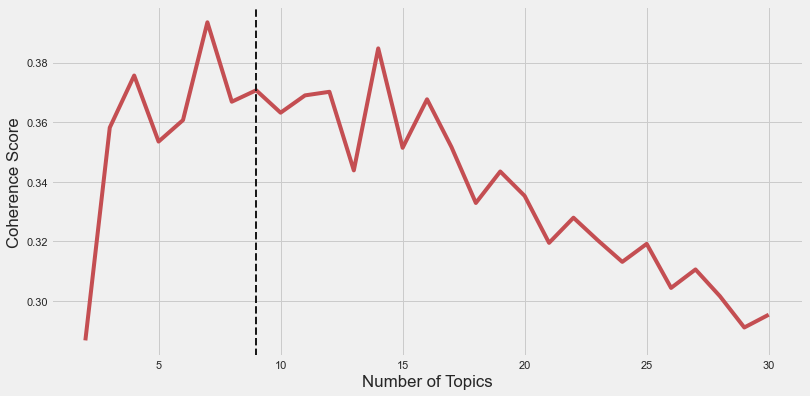

In [108]:
plt.style.use('fivethirtyeight')

x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axvline(x=9, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')
#plt.axvline((three_down), color='g', linewidth=2)

**Visually confirmed; we will use that** going forwards.

Let's see what **9** topics looks like with pyLDAvis.

In [109]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=9,    # the best result from the coherence_score
                                           random_state=100, 
                                           update_every=1,   
                                           chunksize=100, 
                                           passes=10, # passing over the data this many times
                                           alpha="auto")


In [110]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) # R=30 is the number of words on the right
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.105573  0.338316       1        1  18.833288
7      0.425861  0.163920       2        1  14.813571
3     -0.393426  0.247916       3        1  13.981806
4      0.099804 -0.458290       4        1  13.715330
2      0.169136  0.430371       5        1  12.001291
6     -0.258964 -0.359663       6        1  10.359871
1     -0.403305 -0.084351       7        1   6.689181
8      0.075562 -0.070716       8        1   5.019673
0      0.390905 -0.207503       9        1   4.585988, topic_info=                       Term          Freq         Total Category  logprob  \
265                  police  28340.000000  28340.000000  Default  30.0000   
6                      hong  27970.000000  27970.000000  Default  29.0000   
7                      kong  26655.000000  26655.000000  Default  28.0000   
153                negative  13676.000000  13676.000000  Default  27.0000   
43                       hk  17478.000000  17478.000000  Default  26.0000   
...                     ...           ...           ...      ...      ...   
3133              literally    407.883989    408.861818   Topic9  -4.9120   
2234                    ing    405.364645    406.342397   Topic9  -4.9182   
5510  political_prosecution    400.972120    401.950465   Topic9  -4.9291   
3735             suspicious    394.196630    395.175397   Topic9  -4.9461   
6060                lawless    362.078439    363.056894   Topic9  -5.0311   

      loglift  
265   30.0000  
6     29.0000  
7     28.0000  
153   27.0000  
43    26.0000  
...       ...  
3133   3.0798  
2234   3.0798  
5510   3.0797  
3735   3.0797  
6060   3.0795  

[306 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2250      8  0.998924          aa
864       3  0.999512          ab
2375      8  0.997746  absolutely
191       7  0.999700         act
1008      3  0.999505      action
...     ...       ...         ...
123       6  0.999835        year
506       3  0.999541       young
1162      9  0.998040   youngster
348       8  0.997609       youth
404       3  0.999178        yuen

[295 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 4, 5, 3, 7, 2, 9, 1])

<a id='eda_words_in_t'></a>**Words in Topics** | Looking at which words dominate our new identified topics in a DataFrame.

In [111]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 9].index[0]
best_lda_model = lda_models[best_model_idx]
print('As confirmed, we have',best_lda_model.num_topics,'topics.')

As confirmed, we have 9 topics.


In [112]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=20)] 
                   for n in range(0, best_lda_model.num_topics)]

topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

Topic 1            Topic 2       Topic 3       Topic 4  \
Term1                  china             police            hk      negative   
Term2               negative               arst      sanction         world   
Term3                  india                law         watch            fe   
Term4                chinese                 hk        puppet  is_terrorist   
Term5                   stop            citizen      vernment           ccp   
Term6                   time          brutality        action        people   
Term7                    bad             people       with_hk           tit   
Term8   country_modern_slave             attack            vt         lieve   
Term9                   work              force        family           nba   
Term10                taiwan               rule           ccp      hkpolice   
Term11                    so  national_security          face       chinese   
Term12                 tweet            protest      official            gt   
Term13                 toher         journalist           wel          year   
Term14                   too              shame          hker           try   
Term15                  call          protester            uk          june   
Term16                 crazy               year      innocent          well   
Term17             political              right       condemn          dead   
Term18                follow             charge         basic           als   
Term19                   ban               kill  is_terrorist          hope   
Term20                nation                pss       country         allow   

             Topic 5       Topic 6    Topic 7    Topic 8 Topic 9  
Term1          never       support        fem       hong   never  
Term2           life         thank      fight       kong     for  
Term3         matter         speak    justice     people   truth  
Term4     hongkonger       folded_       help      right    year  
Term5        surnder           als       evil      china      od  
Term6        deserve       d_heart       hker      stand     lie  
Term7            fem         stand    country         hu   video  
Term8           live         watch  democracy      world   again  
Term9            pay        murder      world        fem    ason  
Term10         spect           gat        end        ccp    news  
Term11          stop  is_terrorist       need         fe  people  
Term12  is_terrorist          hope    tyranny    country    tell  
Term13           ccp         court       keep      thank    stet  
Term14         money          walk    destroy      tortu   mulan  
Term15        people    hongkonger   continue     indian    port  
Term16           die            ve      stand  democracy   trust  
Term17          only        proije       stop   autonomy    thug  
Term18         young          gang        pss     konger  weapon  
Term19         death          keep     system        hub   start  
Term20          save       twitter     speech       time     guy

In [113]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df

Terms per Topic
Topic1  china, negative, india, chinese, stop, time, bad, country_modern_slave, work, taiwan, so, tweet, toher, too, call, crazy, political, follow, ban, nation        
Topic2  police, arst, law, hk, citizen, brutality, people, attack, force, rule, national_security, protest, journalist, shame, protester, year, right, charge, kill, pss
Topic3  hk, sanction, watch, puppet, vernment, action, with_hk, vt, family, ccp, face, official, wel, hker, uk, innocent, condemn, basic, is_terrorist, country         
Topic4  negative, world, fe, is_terrorist, ccp, people, tit, lieve, nba, hkpolice, chinese, gt, year, try, june, well, dead, als, hope, allow                           
Topic5  never, life, matter, hongkonger, surnder, deserve, fem, live, pay, spect, stop, is_terrorist, ccp, money, people, die, only, young, death, save                 
Topic6  support, thank, speak, folded_, als, d_heart, stand, watch, murder, gat, is_terrorist, hope, court, walk, hongkonger, ve, proije, gang, keep, twitter           
Topic7  fem, fight, justice, help, evil, hker, country, democracy, world, end, need, tyranny, keep, destroy, continue, stand, stop, pss, system, speech                 
Topic8  hong, kong, people, right, china, stand, hu, world, fem, ccp, fe, country, thank, tortu, indian, democracy, autonomy, konger, hub, time                         
Topic9  never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy

<a id='eda_top_dist'></a>**Topics Distribution** | Looking at the distribution of topic dominance in the DataFrame.

In [114]:
tm_results = best_lda_model[corpus]

In [115]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                 for topics in tm_results]
corpus_topics[:5]

[(5, 0.7036992),
 (8, 0.4335799),
 (8, 0.43358627),
 (4, 0.7036906),
 (8, 0.43476376)]

In [116]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(df_cluster))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Tweets'] = df_cluster['tweet']
corpus_topic_df = corpus_topic_df.drop(['Document'], axis=1)

In [117]:
corpus_topic_df.head(5)

Dominant Topic  Contribution %  \
0  6               70.37            
1  9               43.36            
2  9               43.36            
3  5               70.37            
4  9               43.48            

                                                                                                                                              Topic Desc  \
0  support, thank, speak, folded_, als, d_heart, stand, watch, murder, gat, is_terrorist, hope, court, walk, hongkonger, ve, proije, gang, keep, twitter   
1  never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy                            
2  never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy                            
3  never, life, matter, hongkonger, surnder, deserve, fem, live, pay, spect, stop, is_terrorist, ccp, money, people, die, only, young, death, save         
4  never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy                            

                                                                         Tweets  
0  thanks speaking us                                                            
1  how stop china hong kong read new report danish think tank cipo               
2  how stop china hong kong read new report danish think tank cipo               
3  war communism                                                                 
4  how stop china hong kong read new report danish think tank cipo

In [118]:
topic_stats = pd.DataFrame([])
topic_stats = corpus_topic_df.groupby(by=['Dominant Topic'])['Dominant Topic'].agg([("count")])
topic_stats = topic_stats.reset_index()
topic_stats.columns = ['Dominant Topic','# of Observations']
topic_stats['% of Observations'] = ( topic_stats['# of Observations'] / topic_stats['# of Observations'].sum() )

# pulling from another dataframe for terms
topics_l = pd.DataFrame([])
topics_l = pd.DataFrame([topics_df['Terms per Topic'].copy()]).T
topics_l.reset_index(inplace = True)
topics_l = topics_l.drop(['index'], axis=1)
topic_stats['Terms'] = topics_l['Terms per Topic']

In [119]:
topic_stats.head(9)

Dominant Topic  # of Observations  % of Observations  \
0  1               17747              0.108413            
1  2               26969              0.164749            
2  3               10594              0.064717            
3  4               14244              0.087014            
4  5               11528              0.070422            
5  6               24856              0.151841            
6  7               14623              0.089329            
7  8               31071              0.189807            
8  9               12066              0.073709            

                                                                                                                                                              Terms  
0  china, negative, india, chinese, stop, time, bad, country_modern_slave, work, taiwan, so, tweet, toher, too, call, crazy, political, follow, ban, nation          
1  police, arst, law, hk, citizen, brutality, people, attack, force, rule, national_security, protest, journalist, shame, protester, year, right, charge, kill, pss  
2  hk, sanction, watch, puppet, vernment, action, with_hk, vt, family, ccp, face, official, wel, hker, uk, innocent, condemn, basic, is_terrorist, country           
3  negative, world, fe, is_terrorist, ccp, people, tit, lieve, nba, hkpolice, chinese, gt, year, try, june, well, dead, als, hope, allow                             
4  never, life, matter, hongkonger, surnder, deserve, fem, live, pay, spect, stop, is_terrorist, ccp, money, people, die, only, young, death, save                   
5  support, thank, speak, folded_, als, d_heart, stand, watch, murder, gat, is_terrorist, hope, court, walk, hongkonger, ve, proije, gang, keep, twitter             
6  fem, fight, justice, help, evil, hker, country, democracy, world, end, need, tyranny, keep, destroy, continue, stand, stop, pss, system, speech                   
7  hong, kong, people, right, china, stand, hu, world, fem, ccp, fe, country, thank, tortu, indian, democracy, autonomy, konger, hub, time                           
8  never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy

Text(0.5, 1.0, 'Looking at the % Contribution of Tweets within Topics')

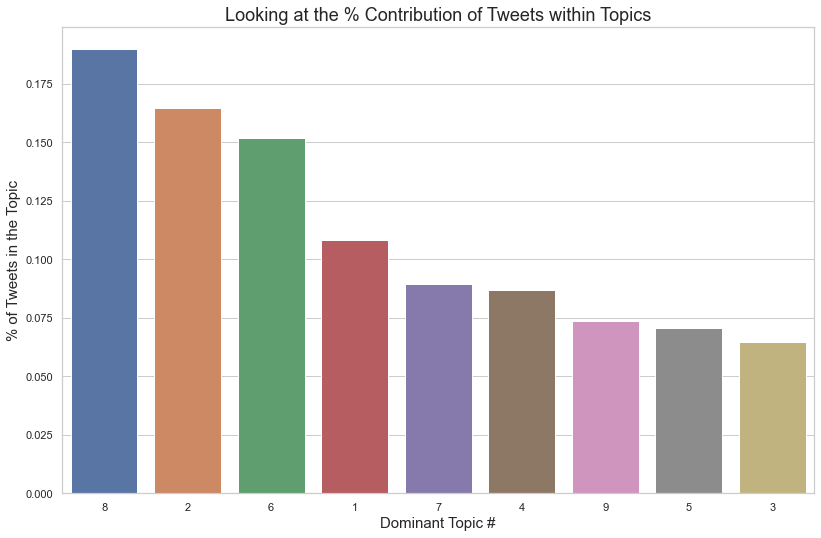

In [120]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
# clrs = ['grey' if (x < max(topic_stats['% of Observations'])) else 'red' for x in topic_stats['% of Observations'] ]
ax = sns.barplot(x="Dominant Topic", y="% of Observations", data=topic_stats,
                 order=topic_stats.sort_values('% of Observations',ascending = False)['Dominant Topic'])
plt.xlabel("Dominant Topic #", size=15)
plt.ylabel("% of Tweets in the Topic", size=15)
plt.title("Looking at the % Contribution of Tweets within Topics", size=18)

In [121]:
topic_stats.sort_values(by=['% of Observations'], ascending=False)

Dominant Topic  # of Observations  % of Observations  \
7  8               31071              0.189807            
1  2               26969              0.164749            
5  6               24856              0.151841            
0  1               17747              0.108413            
6  7               14623              0.089329            
3  4               14244              0.087014            
8  9               12066              0.073709            
4  5               11528              0.070422            
2  3               10594              0.064717            

                                                                                                                                                              Terms  
7  hong, kong, people, right, china, stand, hu, world, fem, ccp, fe, country, thank, tortu, indian, democracy, autonomy, konger, hub, time                           
1  police, arst, law, hk, citizen, brutality, people, attack, force, rule, national_security, protest, journalist, shame, protester, year, right, charge, kill, pss  
5  support, thank, speak, folded_, als, d_heart, stand, watch, murder, gat, is_terrorist, hope, court, walk, hongkonger, ve, proije, gang, keep, twitter             
0  china, negative, india, chinese, stop, time, bad, country_modern_slave, work, taiwan, so, tweet, toher, too, call, crazy, political, follow, ban, nation          
6  fem, fight, justice, help, evil, hker, country, democracy, world, end, need, tyranny, keep, destroy, continue, stand, stop, pss, system, speech                   
3  negative, world, fe, is_terrorist, ccp, people, tit, lieve, nba, hkpolice, chinese, gt, year, try, june, well, dead, als, hope, allow                             
8  never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy                                      
4  never, life, matter, hongkonger, surnder, deserve, fem, live, pay, spect, stop, is_terrorist, ccp, money, people, die, only, young, death, save                   
2  hk, sanction, watch, puppet, vernment, action, with_hk, vt, family, ccp, face, official, wel, hker, uk, innocent, condemn, basic, is_terrorist, country

In [122]:
n = (topic_stats['% of Observations'][1]+topic_stats['% of Observations'][3]+topic_stats['% of Observations'][2]+topic_stats['% of Observations'][5]).sum()
print('It appears that',"{:,}%".format(round(n*100,0)),'of the Tweets fall into 4 categories.')

It appears that 47.0% of the Tweets fall into 4 categories.


**Topic Sentiment** | Taking a look at how the Sentiment of these 9 Topics played out.

In [123]:
topic_sent = pd.concat([corpus_topic_df,df_cluster['comp']],
                    axis = 1, ignore_index=False)

In [124]:
topic_sent.head(2)

Dominant Topic  Contribution %  \
0  6.0             70.37            
1  9.0             43.36            

                                                                                                                                              Topic Desc  \
0  support, thank, speak, folded_, als, d_heart, stand, watch, murder, gat, is_terrorist, hope, court, walk, hongkonger, ve, proije, gang, keep, twitter   
1  never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy                            

                                                                         Tweets  \
0  thanks speaking us                                                             
1  how stop china hong kong read new report danish think tank cipo                

     comp  
0  0.4404  
1 -0.2960

[Text(0.5, 0, 'Topics'), Text(0, 0.5, 'Sentiment Scores (Comp)')]

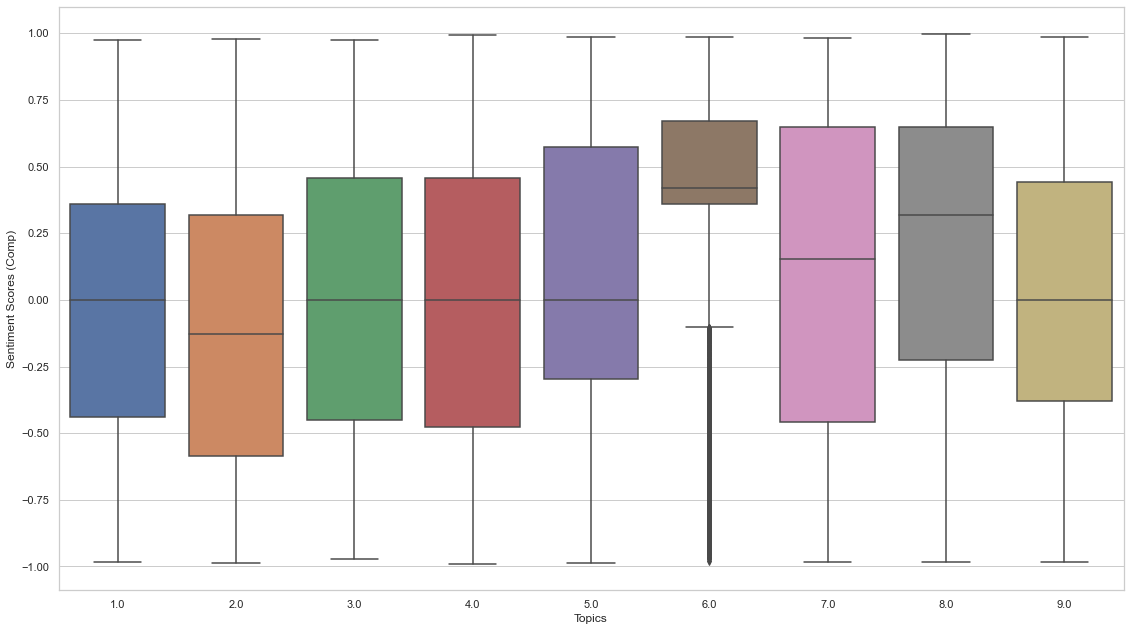

In [125]:
fig, ax = plt.subplots(1,1, figsize=(17,10))
ax = sns.boxplot(x="Dominant Topic", y="comp", data=topic_sent)
#ax.set(title='Comp Score ( Titles )')
ax.set(xlabel='Topics', ylabel='Sentiment Scores (Comp)')


We can see that the breakdown of Positive & Negative as:
   * Positive
     * Numbers 2, 4 & 6
   * Negative
     * Number 9

The rest appear Neutral. We will remind ourselves what the key words defining the Positive & Negative Topics are.

We will do the **Positive** first:

In [126]:
print(
     ' Topic',topic_stats['Dominant Topic'][1],'|',topic_stats['Terms'][1],'\n',
     'Topic',topic_stats['Dominant Topic'][3],'|',topic_stats['Terms'][3],'\n',
     'Topic',topic_stats['Dominant Topic'][5],'|',topic_stats['Terms'][5],'\n',)

 Topic 2 | police, arst, law, hk, citizen, brutality, people, attack, force, rule, national_security, protest, journalist, shame, protester, year, right, charge, kill, pss 
 Topic 4 | negative, world, fe, is_terrorist, ccp, people, tit, lieve, nba, hkpolice, chinese, gt, year, try, june, well, dead, als, hope, allow 
 Topic 6 | support, thank, speak, folded_, als, d_heart, stand, watch, murder, gat, is_terrorist, hope, court, walk, hongkonger, ve, proije, gang, keep, twitter 



Now the **Negative**.

In [127]:
print(
     'Topic',topic_stats['Dominant Topic'][8],'|',topic_stats['Terms'][8])

Topic 9 | never, for, truth, year, od, lie, video, again, ason, news, people, tell, stet, mulan, port, trust, thug, weapon, start, guy


**Topics Distribution Summary** 
It appears that the **Positive** Topic Categories revolve around 
   * thanks for support & mentions of freedom & democracy
   
The **Negative** category discusses:
   * fighting & corruption.

Final mention is that the majority ( 61% ) of the Tweets fell into 4 categories. All 3 of the Positive Topics are in this category while the Negative category was also the smallest.

# **2.4 EDA Summary**<a id='eda_summary'></a>

We will first run over **the process undertaken** & **high-level findings**:
   * Reviewed the Skewness of the Sentiment Analysis
     * Gained initial suggestions to review the Tweet population's position on the law or something associated with it 
   * Investigated a potential progression of the Sentiment on a Time Series
     * Movements towards Positivity was seen in late-June & early August while movements towards Negativity was seen in late August
   * Looked a Bigrams of words used in the Positive & Negative Categories & the breakdown towards the below
     * Positivity | Thanks much / support, Free World, help & folded_hands ( 🙏 )
     * Negativity | Evil CCP, Police Brutality, Fighting & Holdings Hands ( 👬 )
     * Mentioned in both | Human Rights & freedom press / democracy
     * There appears to be a Pro-China or Pro-HK split.
   * Investigated links to geopolitical entities as well as potential sarcasm directed towards them
     * Positive mentions to the US while mentions towards China may be sarcastic
   * Identified the optimal number of topics discussed on the Tweets to be 9 & reviewed the extremes of them
     * A Positive & Negative Split between Thanks for support towards freedom & fighting respectively.

